# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: Violeta

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Victor Hugo 160019401
- Fabiana Ribas	160005736
- Ana Carolina 190063441
- Leticia Meneses 160131936
- Pedro Henrique 170020525
- Philipe Serafim 160141842
- Iago de Andrade 160124701
- Wesley Santos 180029240
- Mateus Moreira 180024868

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
from scipy import stats as st
import json
from glob import glob
import os


# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from openpyxl.workbook import Workbook

from sklearn.linear_model import LinearRegression

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [4]:
jsons = glob('analytics-raw-data/*.json') # add the path here

In [5]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"Violeta-(.*?)-date_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [6]:
base_component_df = create_base_component_df(jsons)

In [7]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
88,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
89,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
90,functions,54,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
91,ncloc,1523,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
92,reliability_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
93,security_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
94,comment_lines_density,18.1,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
95,files,69,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
80,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0
81,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0


#### Create dataframe per file

In [8]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [9]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"Violeta-(.*?)-date_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [10]:
file_component_df = create_file_df(jsons)

In [11]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
166,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
167,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
168,frontend/src/components/footer.js,1,1,0.0,0.0,NaN,57,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
169,frontend/src/components/header.js,3,5,0.0,0.0,NaN,44,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
170,frontend/src/components/home.js,1,1,0.0,0.0,NaN,21,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
171,frontend/src/index.js,0,0,30.0,0.0,NaN,7,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
172,frontend/src/components/questionario.js,5,5,2.9,0.0,NaN,99,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
173,frontend/src/serviceWorker.js,15,32,19.1,0.0,NaN,93,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
158,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0
159,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0


In [12]:
file_component_df.to_excel('analytics-raw-data/data.xlsx', index = False)

#### Create dataframe per repository

In [13]:
# Example

repo1_df = file_component_df[file_component_df['repository'] == 'Desenvolvimento']

### Metric calculations

##### COMPLEXITY

In [14]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [15]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [16]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

##### Resolved Issues Throughput

In [17]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

##### Issue Density

In [18]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [19]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }

    issue_densities = pd.DataFrame.from_dict(issue_densities).T.reset_index()
    
    issue_densities.columns = ['density' ,'percentage']
    
    return issue_densities

##### Bug Ratio

In [20]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

### Calculate m1, m2 and m3 for each repository

In [21]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [22]:
repo1_metrics = create_metrics_df(repo1_df)

### Data visualization

In [23]:
#Agregação Sub-Característica 1
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repo1_metrics['asc1'] = ((repo1_metrics['m1']*pm1)+(repo1_metrics['m2']*pm2)+(repo1_metrics['m3']*pm3))*psc1

In [24]:
metrics_df = pd.concat([repo1_metrics], ignore_index=True)

metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [25]:
metrics_df.to_excel('analytics-raw-data/metrics_df.xlsx', index = False)

In [26]:
# Estatísticas
media_list = []
mediana_list = []
moda_list = []
min_list = []
max_list = []
desvio_list = []
var_list = []
perc25list = []
perc50list = []
perc75list = []
metrics = ['m1', 'm2', 'm3', 'asc1', 'ac1', 'total']

for metric in metrics:
        media_list.append(np.mean(metrics_df[metric]))
        mediana_list.append(np.median(metrics_df[metric]))
        moda_list.append(st.mode(metrics_df[metric]))
        min_list.append(np.amin(metrics_df[metric]))
        perc25list.append(np.percentile(metrics_df[metric], 25))
        perc50list.append(np.percentile(metrics_df[metric], 50))
        perc75list.append(np.percentile(metrics_df[metric], 75))
        max_list.append(np.amax(metrics_df[metric]))
        desvio_list.append(np.std(metrics_df[metric]))
        var_list.append(np.var(metrics_df[metric]))


statistics = pd.DataFrame({ 'Métricas': metrics,
                            'Medias': media_list,
                            'Modas': moda_list, 
                            'Medianas': mediana_list,
                            'Min': min_list,
                            '25%': perc25list,
                            '50%': perc50list,
                            '75%': perc75list,
                            'Max': max_list,
                            'Desvio Padrão': desvio_list,
                            'Variancia': var_list})

In [27]:
#Cálculo de m8
sprint_list = range(0, 13)
hotfix_list =  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
docs_list =    [12, 4, 8, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
feature_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arq_list =     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
devops_list =  [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
analytics_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
us_list =      [0, 0, 0, 2, 0, 7, 4, 6, 3, 0, 2, 1, 1]
easy_list =    [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3, 2, 2]
medium_list =  [0, 0, 0, 2, 1, 4, 3, 6, 3, 1, 2, 1, 1]
hard_list =    [0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
eps_list =     [21, 8, 10, 3, 3, 3, 2, 2, 2, 3, 2, 2, 4]
mds_list =     [17, 4, 5, 3, 3, 8, 4, 6, 4, 2, 5, 3, 4]

m8_df = pd.DataFrame({'sprint': sprint_list, 
                       'HOTFIX': hotfix_list,
                       'DOCS': docs_list,
                       'FEATURE': feature_list,
                       'ARQ': arq_list,
                       'DEVOPS': devops_list,
                       'ANALYTICS': analytics_list,
                       'US': us_list,
                       'EASY': easy_list,
                       'MEDIUM': medium_list,
                       'HARD': hard_list,
                       'EPS': eps_list,
                       'MDS':mds_list})

In [28]:
# Cálculo de m7 e m9
number_of_issues_resolved = [24, 13, 3, 4 ,6 ,5 ,2 ,2 ,5 , 11, 5 , 3, 4]
NUMBER_OF_ISSUES = np.sum(number_of_issues_resolved)

m7_list = []
m9_list = []

for issues_resolved in sprint_list:
    TAGS = {
    "HOTFIX": hotfix_list[issues_resolved],
    "DOCS": docs_list[issues_resolved],
    "FEATURE": feature_list[issues_resolved],
    "ARQ": arq_list[issues_resolved],
    "DEVOPS": devops_list[issues_resolved],
    "ANALYTICS": analytics_list[issues_resolved],
    "US": us_list[issues_resolved],
    "EASY": easy_list[issues_resolved],
    "MEDIUM": medium_list[issues_resolved],
    "HARD": hard_list[issues_resolved],
    "EPS": eps_list[issues_resolved],
    "MDS": mds_list[issues_resolved]}
    
    m7_list.append(m7(number_of_issues_resolved[issues_resolved], NUMBER_OF_ISSUES))
    m9_list.append(m9(TAGS, NUMBER_OF_ISSUES))
    
    
m7_m9_df = pd.DataFrame({'sprint': sprint_list,
                                  'm7': m7_list,
                                  'm9': m9_list})

In [29]:
metrics_df.set_index('version')

,m1,m2,m3,repository,asc1,ac1,total
version,,,,,,,
v1.00.0,0.875000,0.125000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.01.0,0.875000,0.125000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.04.0,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.05.0,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.06.0,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.07.0,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.07.1,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.07.2,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000
v1.07.3,0.900000,0.100000,1.000000,Desenvolvimento,0.660000,0.660000,0.660000


In [30]:
statistics.set_index('Métricas')

,Medias,Modas,Medianas,Min,25%,50%,75%,Max,Desvio Padrão,Variancia
Métricas,,,,,,,,,,
m1,0.870515,"([0.9], [7])",0.875,0.818182,0.846154,0.875,0.90,0.900,0.028970,0.000839
m2,0.092785,"([0.1], [7])",0.100,0.052632,0.076923,0.100,0.10,0.125,0.017944,0.000322
m3,0.991776,"([1.0], [15])",1.000,0.868421,1.000000,1.000,1.00,1.000,0.031850,0.001014
asc1,0.645175,"([0.6600000000000001], [7])",0.660,0.581842,0.634615,0.660,0.66,0.660,0.020655,0.000427
ac1,0.645175,"([0.6600000000000001], [7])",0.660,0.581842,0.634615,0.660,0.66,0.660,0.020655,0.000427
total,0.645175,"([0.6600000000000001], [7])",0.660,0.581842,0.634615,0.660,0.66,0.660,0.020655,0.000427


In [31]:
#Agregação Sub-Característica 2
psc1 = 1
pm1 = 0.5
pm2 = 0.5

m7_m9_df['asc2'] = ((m7_m9_df['m7']*pm1)+(m7_m9_df['m9']*pm2))*psc1

In [32]:
m7_m9_df['ac2'] = m7_m9_df['asc2'] * 1
m7_m9_df['total'] = m7_m9_df['asc2'] * 1

m7_m9_df

,sprint,m7,m9,asc2,ac2,total
0,0,27.59,13.79,20.690,20.690,20.690
1,1,14.94,10.34,12.640,12.640,12.640
2,2,3.45,10.34,6.895,6.895,6.895
3,3,4.60,3.45,4.025,4.025,4.025
4,4,6.90,3.45,5.175,5.175,5.175
5,5,5.75,2.30,4.025,4.025,4.025
6,6,2.30,2.30,2.300,2.300,2.300
7,7,2.30,2.30,2.300,2.300,2.300
8,8,5.75,2.30,4.025,4.025,4.025
9,9,12.64,2.30,7.470,7.470,7.470


In [33]:
m7_m9_df.set_index('sprint')

,m7,m9,asc2,ac2,total
sprint,,,,,
0,27.59,13.79,20.690,20.690,20.690
1,14.94,10.34,12.640,12.640,12.640
2,3.45,10.34,6.895,6.895,6.895
3,4.60,3.45,4.025,4.025,4.025
4,6.90,3.45,5.175,5.175,5.175
5,5.75,2.30,4.025,4.025,4.025
6,2.30,2.30,2.300,2.300,2.300
7,2.30,2.30,2.300,2.300,2.300
8,5.75,2.30,4.025,4.025,4.025


In [34]:
m7_m9_df.to_excel('analytics-raw-data/fga-eps-mds-2020-2-Violeta-qualidade-total-processo.xlsx', index = False)

In [35]:
m8_df.set_index('sprint')

,HOTFIX,DOCS,FEATURE,ARQ,DEVOPS,ANALYTICS,US,EASY,MEDIUM,HARD,EPS,MDS
sprint,,,,,,,,,,,,
0,0,12,0,0,0,0,0,0,0,0,21,17
1,0,4,0,0,5,0,0,0,0,0,8,4
2,0,8,0,1,0,0,0,0,0,0,10,5
3,0,3,0,0,0,0,2,0,2,0,3,3
4,1,3,0,0,0,0,0,0,1,2,3,3
5,0,2,0,0,0,0,7,1,4,2,3,8
6,0,2,0,0,0,0,4,1,3,0,2,4
7,0,2,0,0,0,0,6,0,6,0,2,6
8,0,2,0,0,0,0,3,1,3,0,2,4


In [36]:
m8_df.to_excel('analytics-raw-data/fga-eps-mds-2020-2-Violeta-qualidade-total-processo-m8.xlsx', index = False)

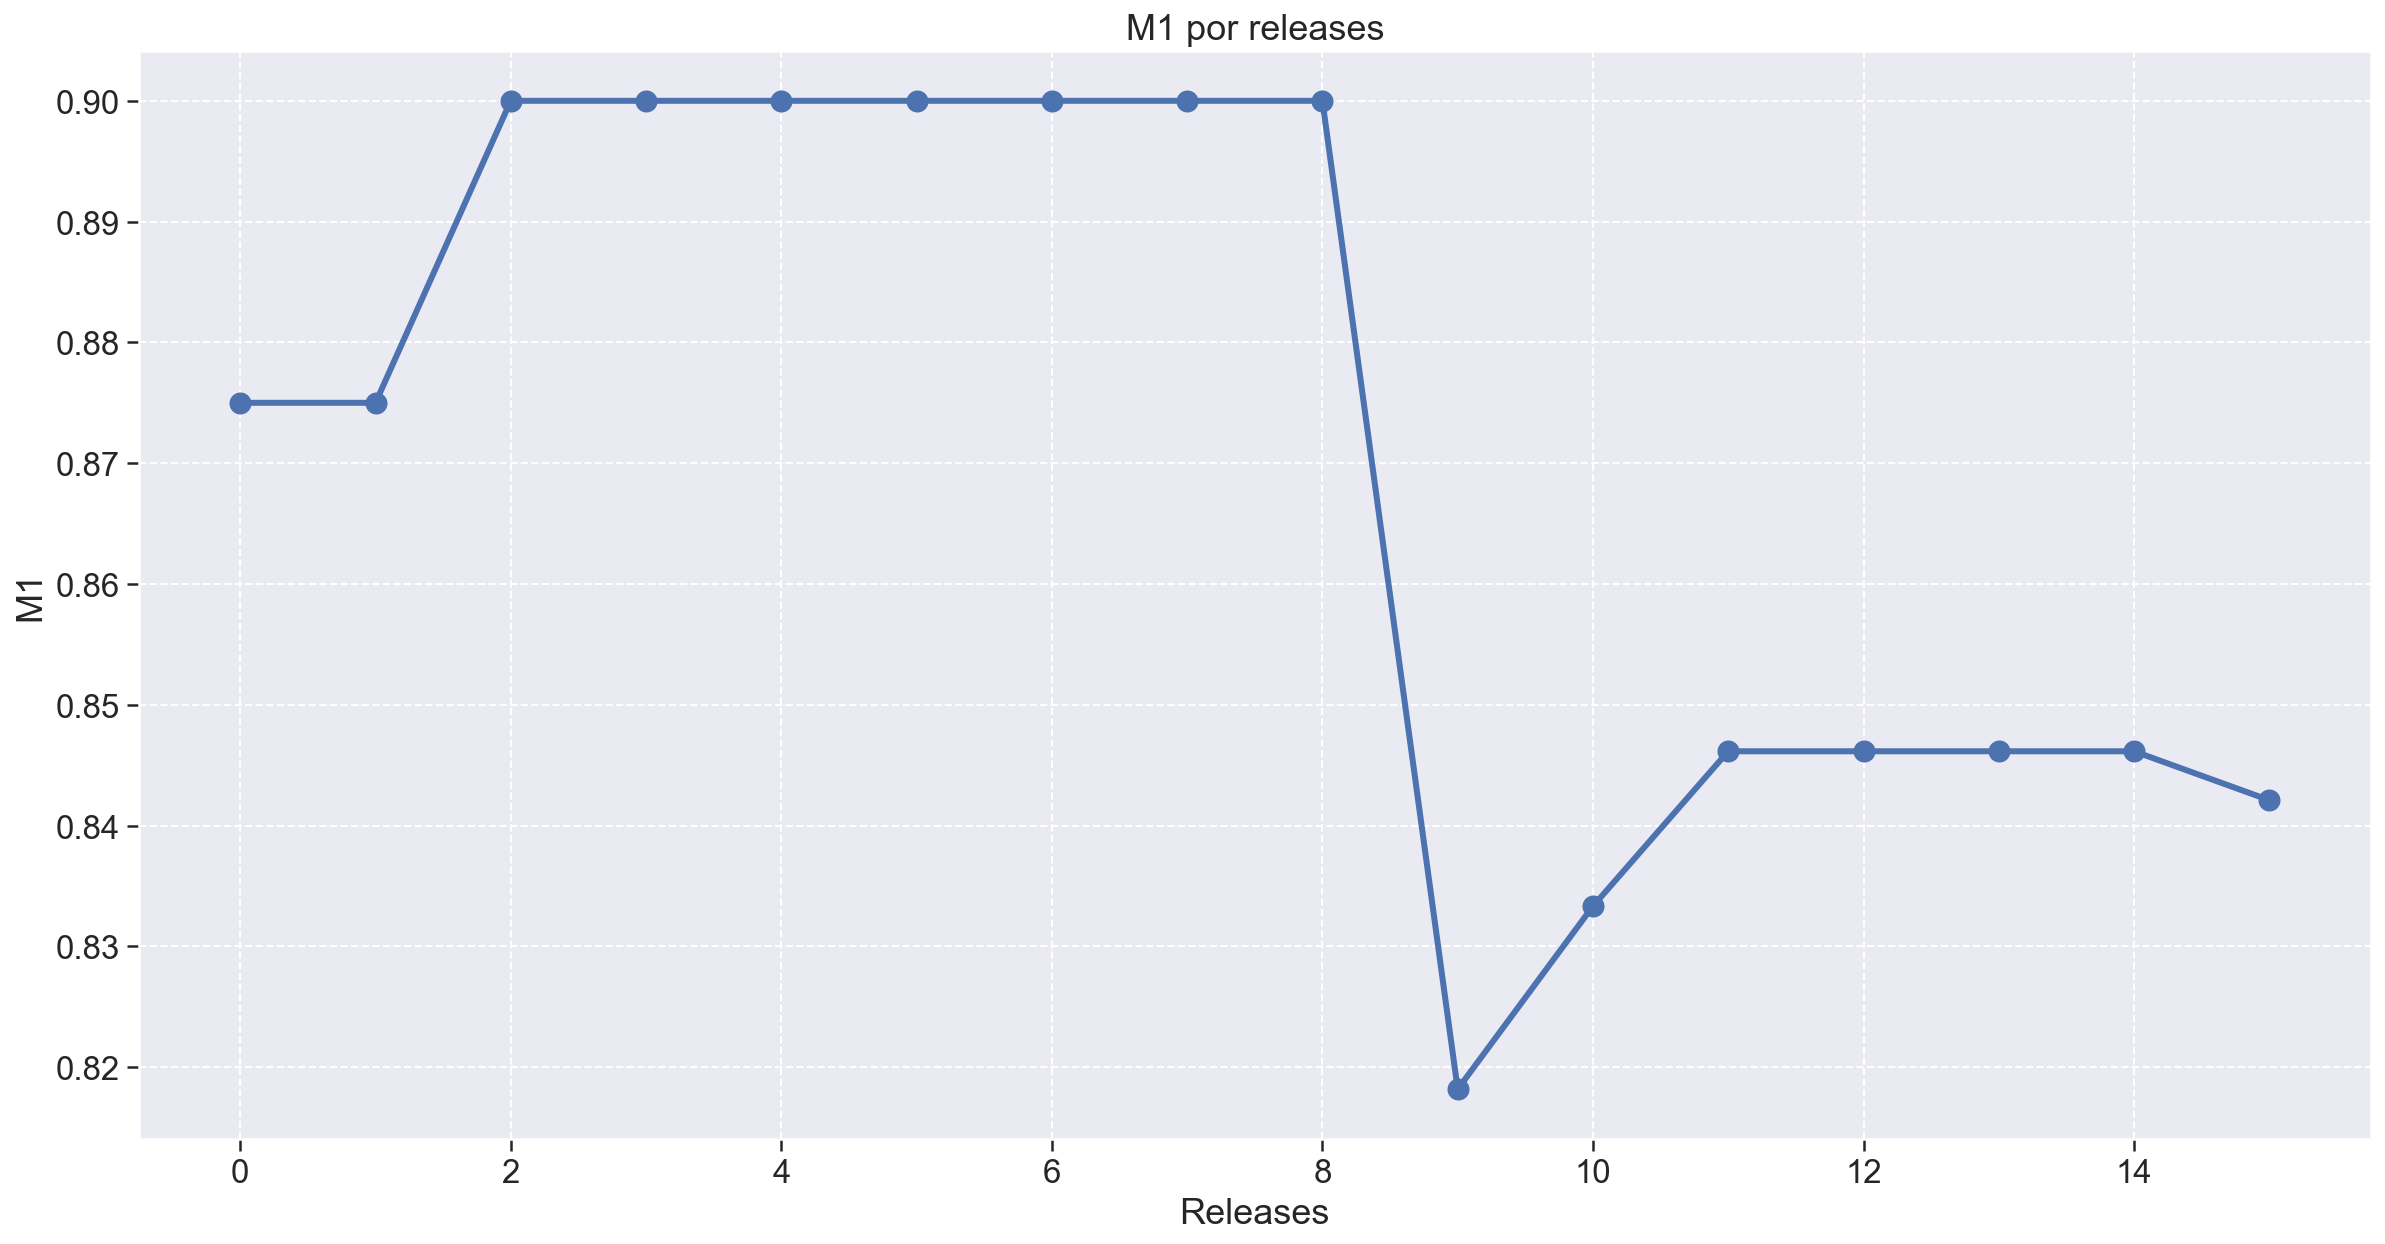

In [37]:
fig = plt.figure(figsize=(20, 10))
plt.title('M1 por releases')
plt.xlabel('Releases')
plt.ylabel('M1')
plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10)

### Complexidade do código

O gráfico acima faz referência a complexidade presente no código em cada release. É possível notar que a complexidade estava alta até uma brusca queda na release v1.07.2, v1.07.3. Isso ocorre devido à necessidade de  refatoração de funcionalidades que antes estavam implementadas de forma a consumir muito tempo de processamento do usuário e do back-end.
Em específico, a funcionalidade do questionário que antes estava muito complexa e repleta de aninhamentos. Ao decorrer do projeto e amadurecimento do time de desenvolvimento foi possível aplicar um solução  que consumisse menos tempo de máquina e fosse mais prática tanto na implementação do front-end como back-end.


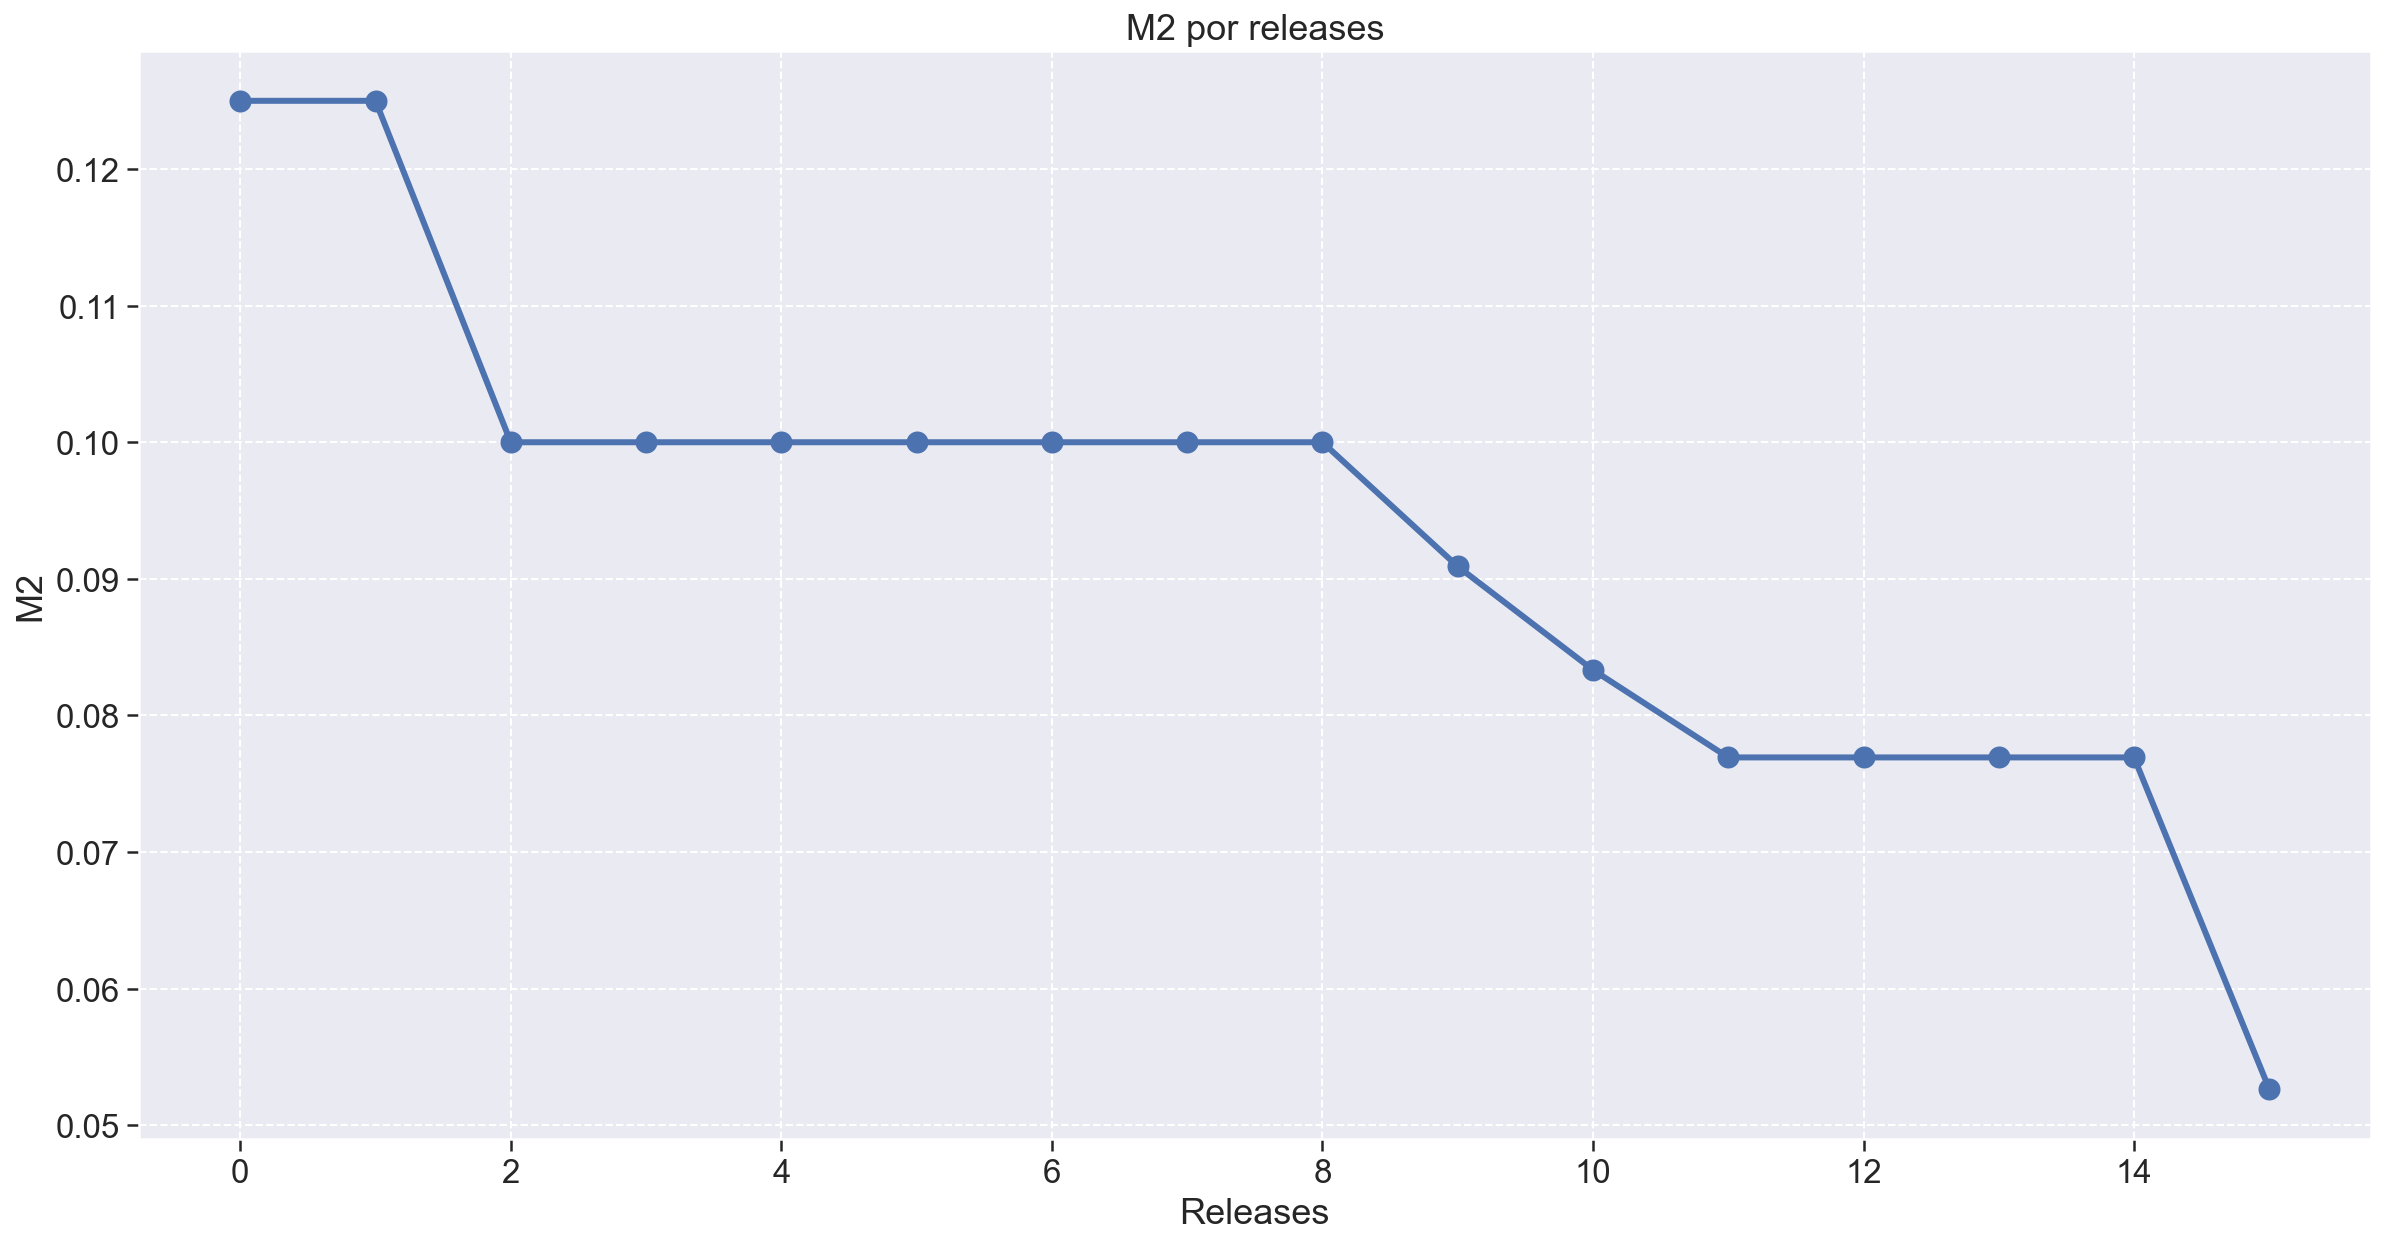

In [38]:
fig = plt.figure(figsize=(20, 10))
plt.title('M2 por releases')
plt.xlabel('Releases')
plt.ylabel('M2')
plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10)

### Densidade de comentários

O gráfico acima trata da densidade de comentários por arquivo. É notável a queda e necessidade de comentários ao longo das releases. Levando em conta que comentários servem como forma de auxílio aos desenvolvedores para compreensão de funcionalidades feitas ao longo do processo de desenvolvimento. A queda dessa métrica demonstra um progresso no amadurecimento do time ao longo das releases. É possível fazer um paralelo com o gráfico de complexidade. Já que a complexidade está baixa o código se encontra autoexplicativo como é recomendado pelos conceitos de clean code.

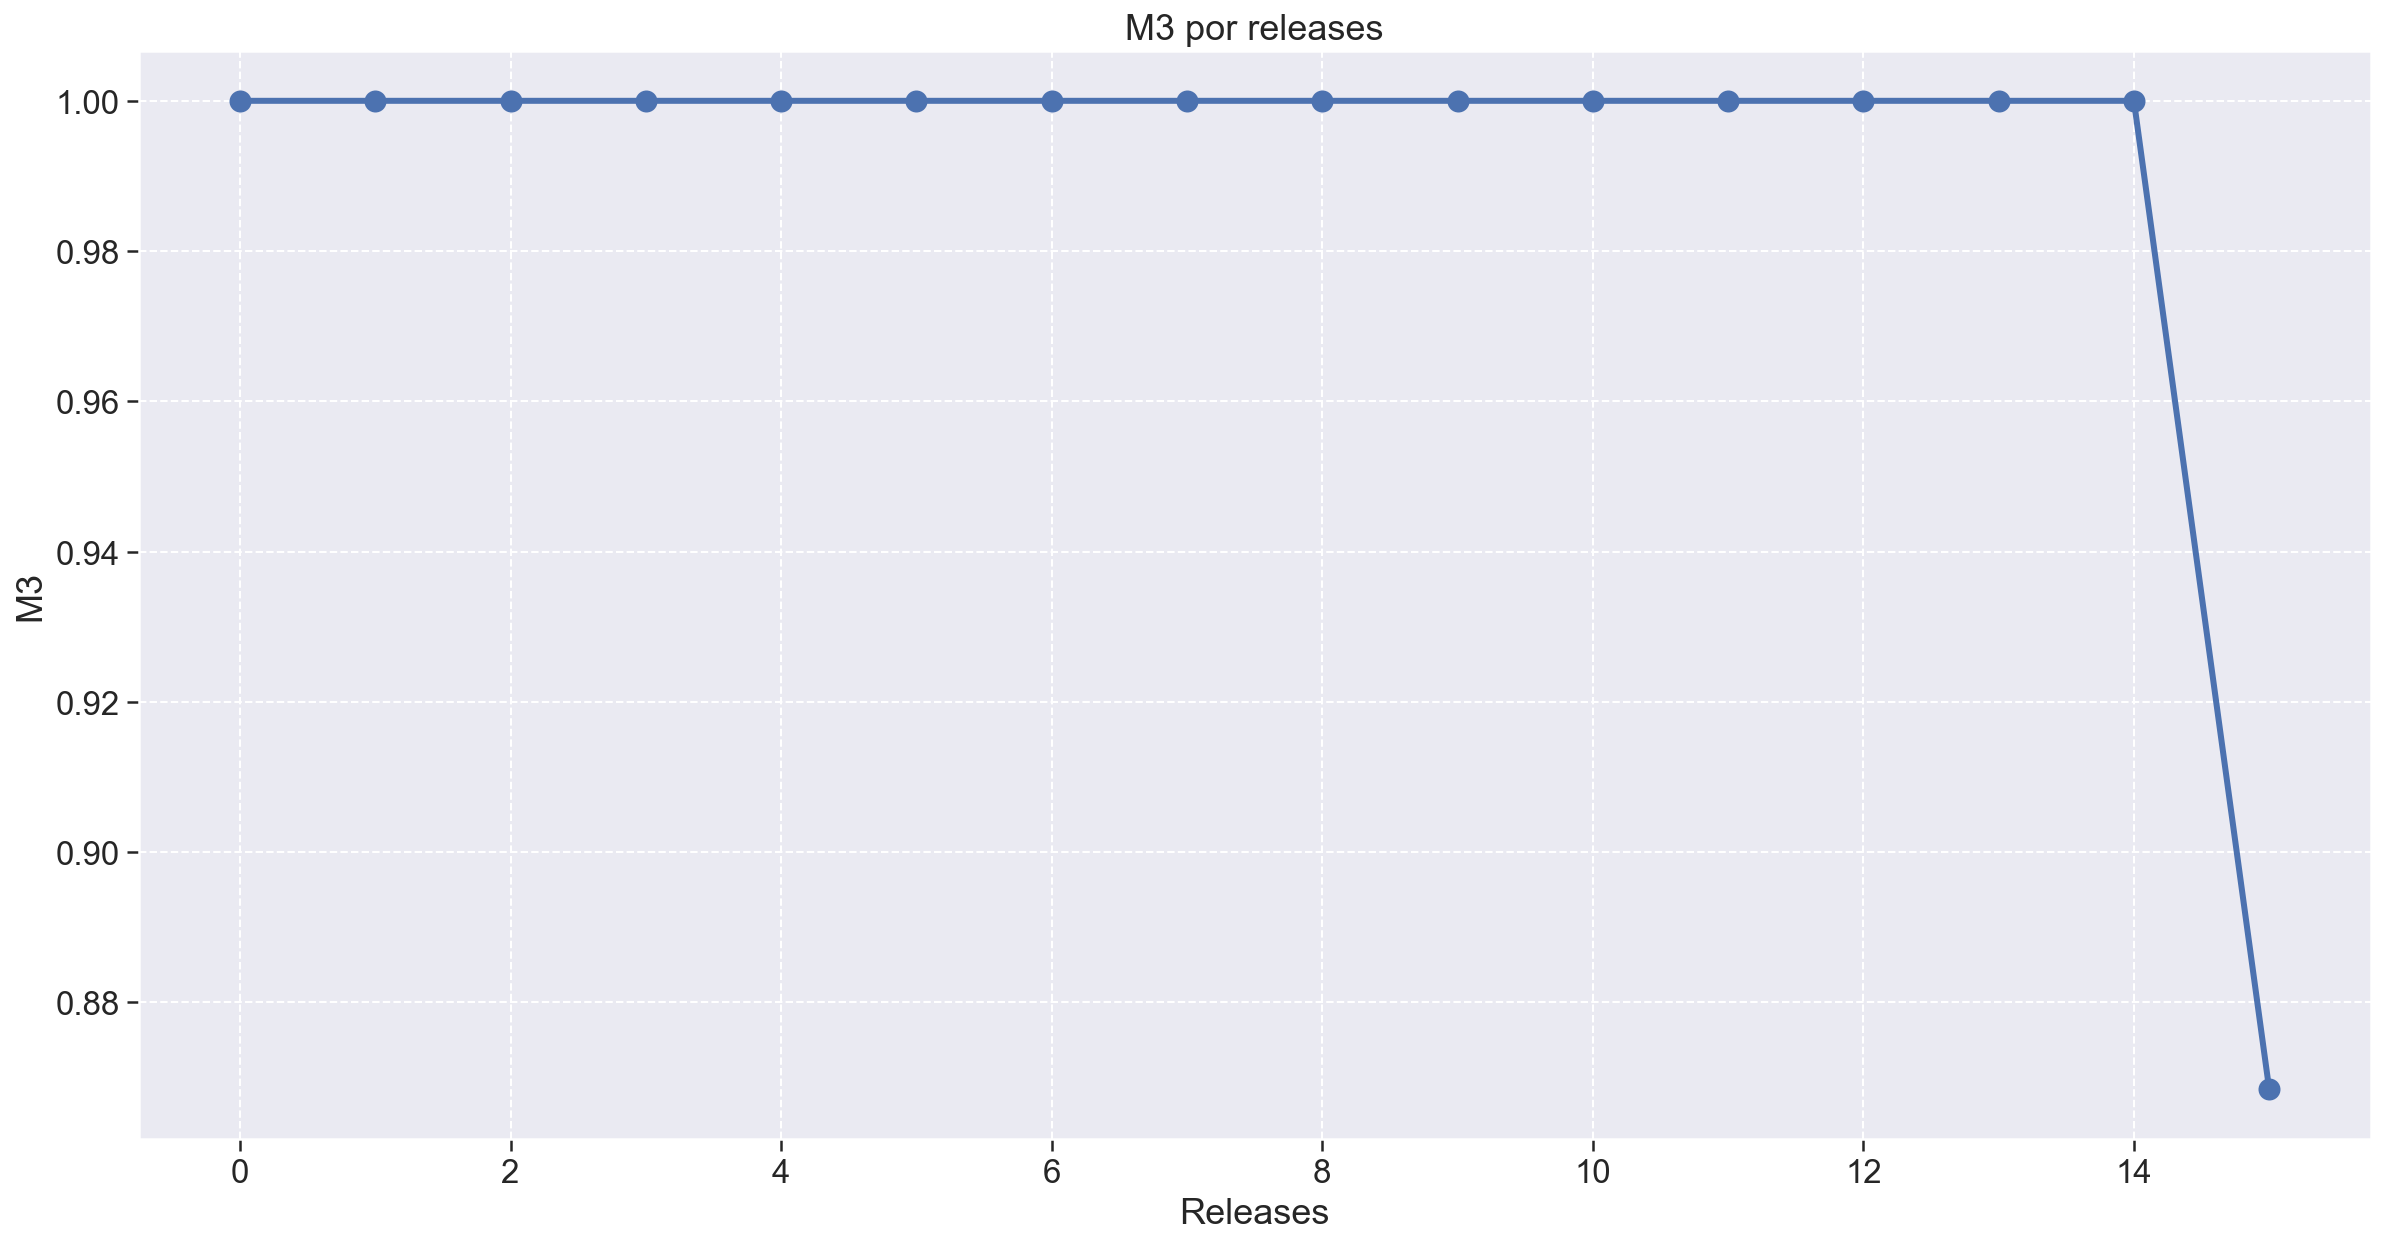

In [39]:
fig = plt.figure(figsize=(20, 10))
plt.title('M3 por releases')
plt.xlabel('Releases')
plt.ylabel('M3')
plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10)

### Linhas duplicadas

O gráfico acima faz menção a densidade de linhas duplicadas. Temos um queda brusca após uma constância de linhas que foram reutilizadas ao longo do desenvolvimento. É notável que ao chegar nas últimas release a duplicidade tem essa queda em virtude da aplicação da biblioteca de teste. Tal biblioteca leva a duplicidades de alguns testes para efetuar testes incrementais.

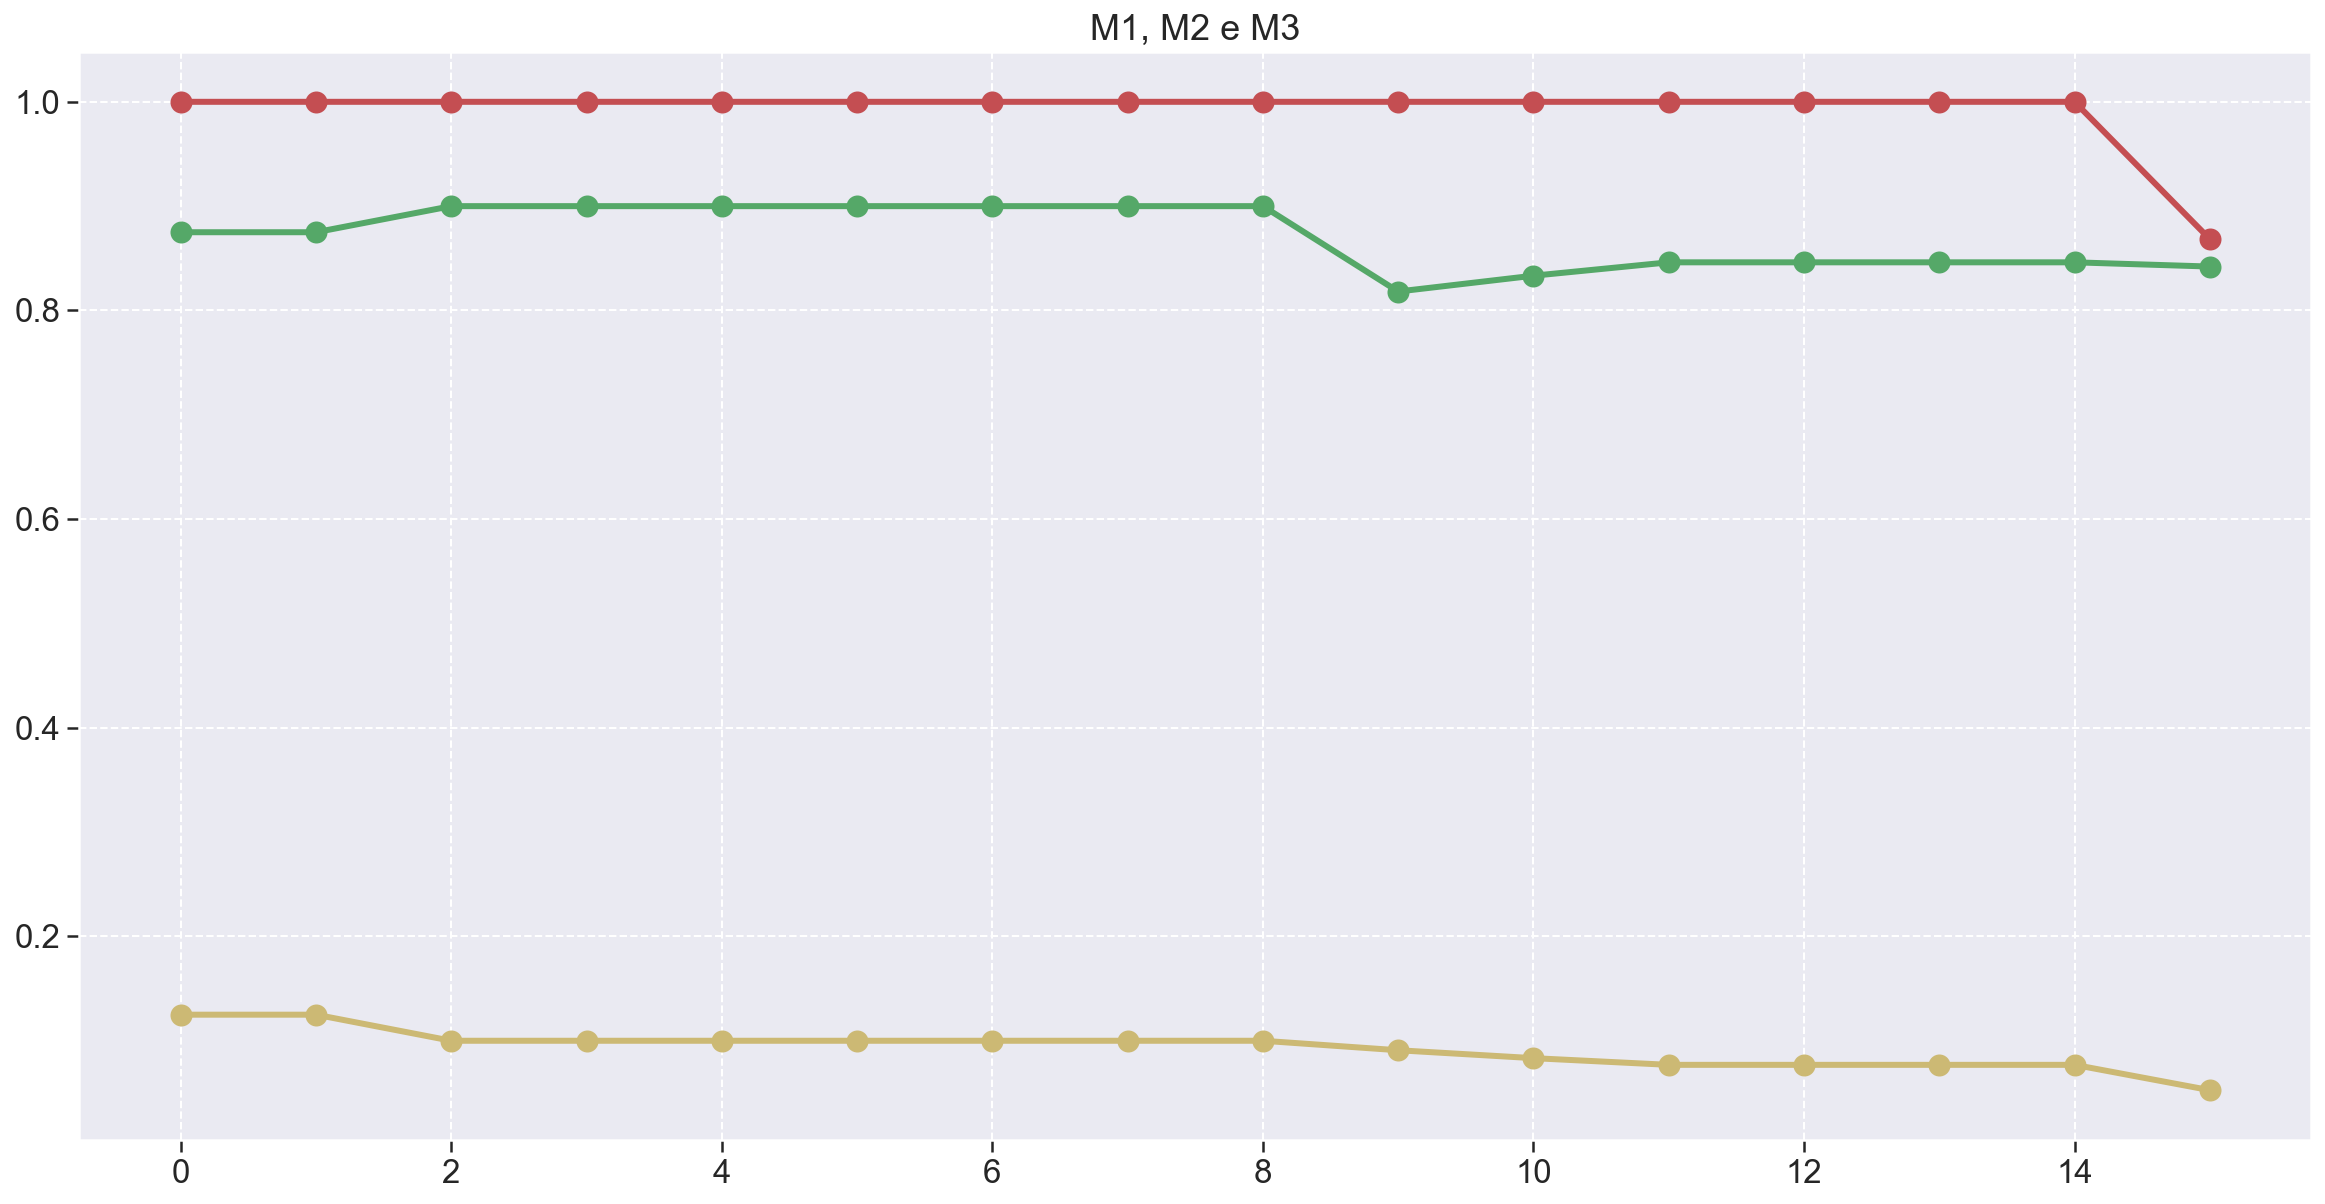

In [40]:
fig = plt.figure(figsize=(20, 10))
plt.title('M1, M2 e M3')
plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10, color='g')
plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10, color='y')
plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10, color='r')

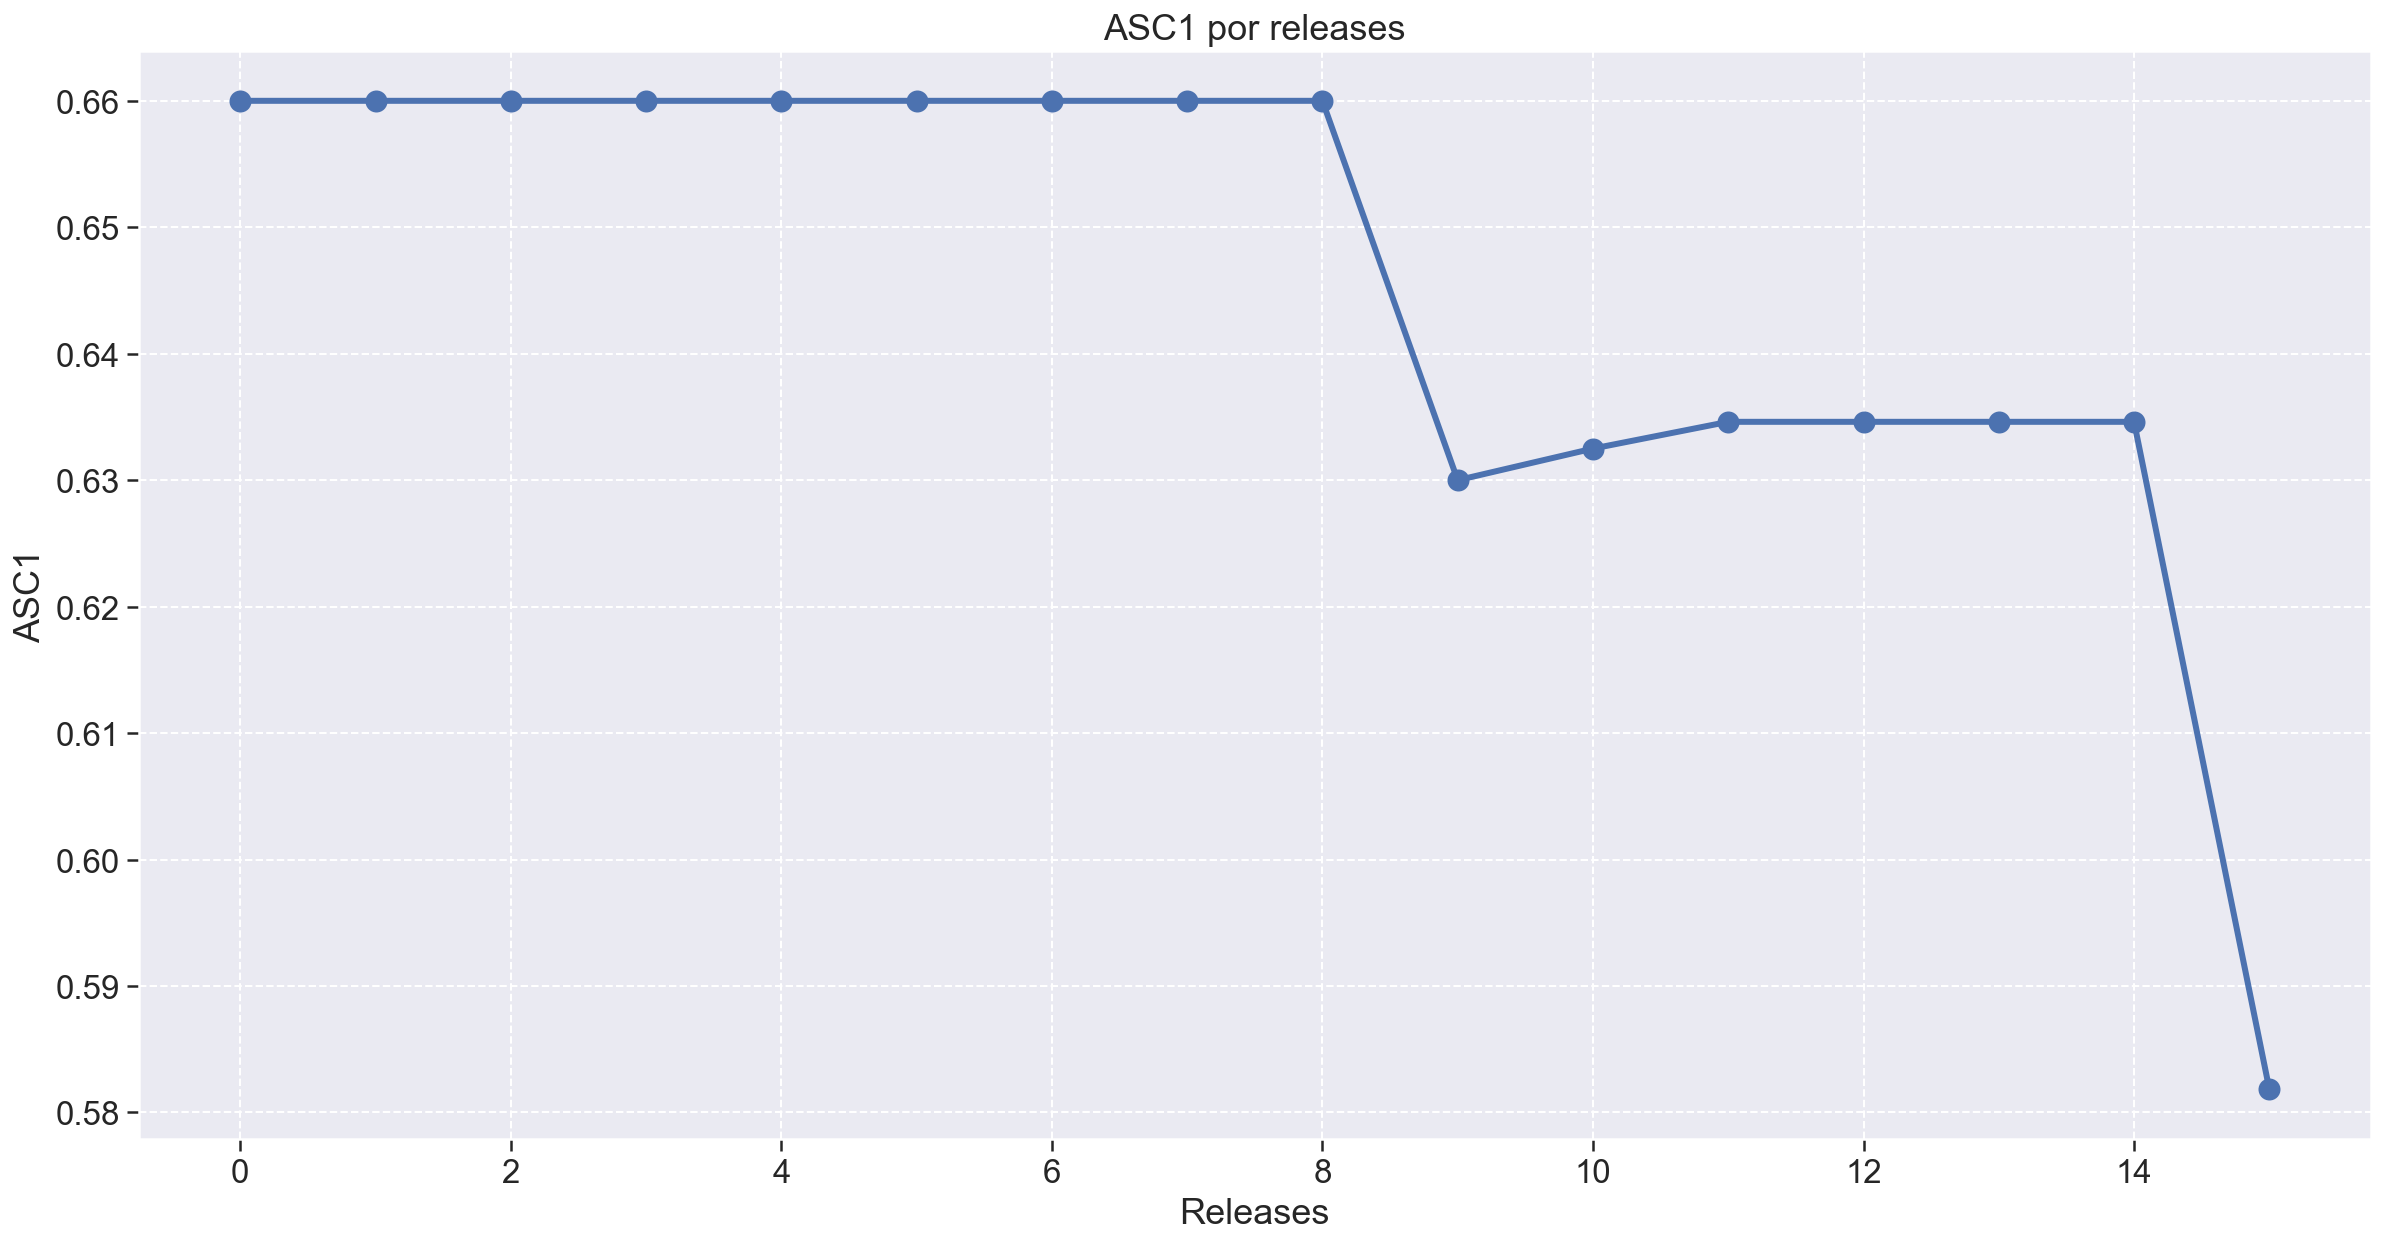

In [41]:
fig = plt.figure(figsize=(20, 10))
plt.title('ASC1 por releases')
plt.xlabel('Releases')
plt.ylabel('ASC1')
plt.plot(repo1_metrics['asc1'], linewidth=3, marker='o', markersize=10)

### Média das métricas

O gráfico acima trabalha com a média das métricas trabalhadas anteriormente. Essa média resulta na qualidade do código. A forma como o gráfico se mostra acima, apresenta a qualidade do produto de forma constante da release 0 até meados da 8. A queda apresentada demonstra de forma clara como a qualidade do produto foi afetada pela refatoração e amadurecimento do desenvolvimento.

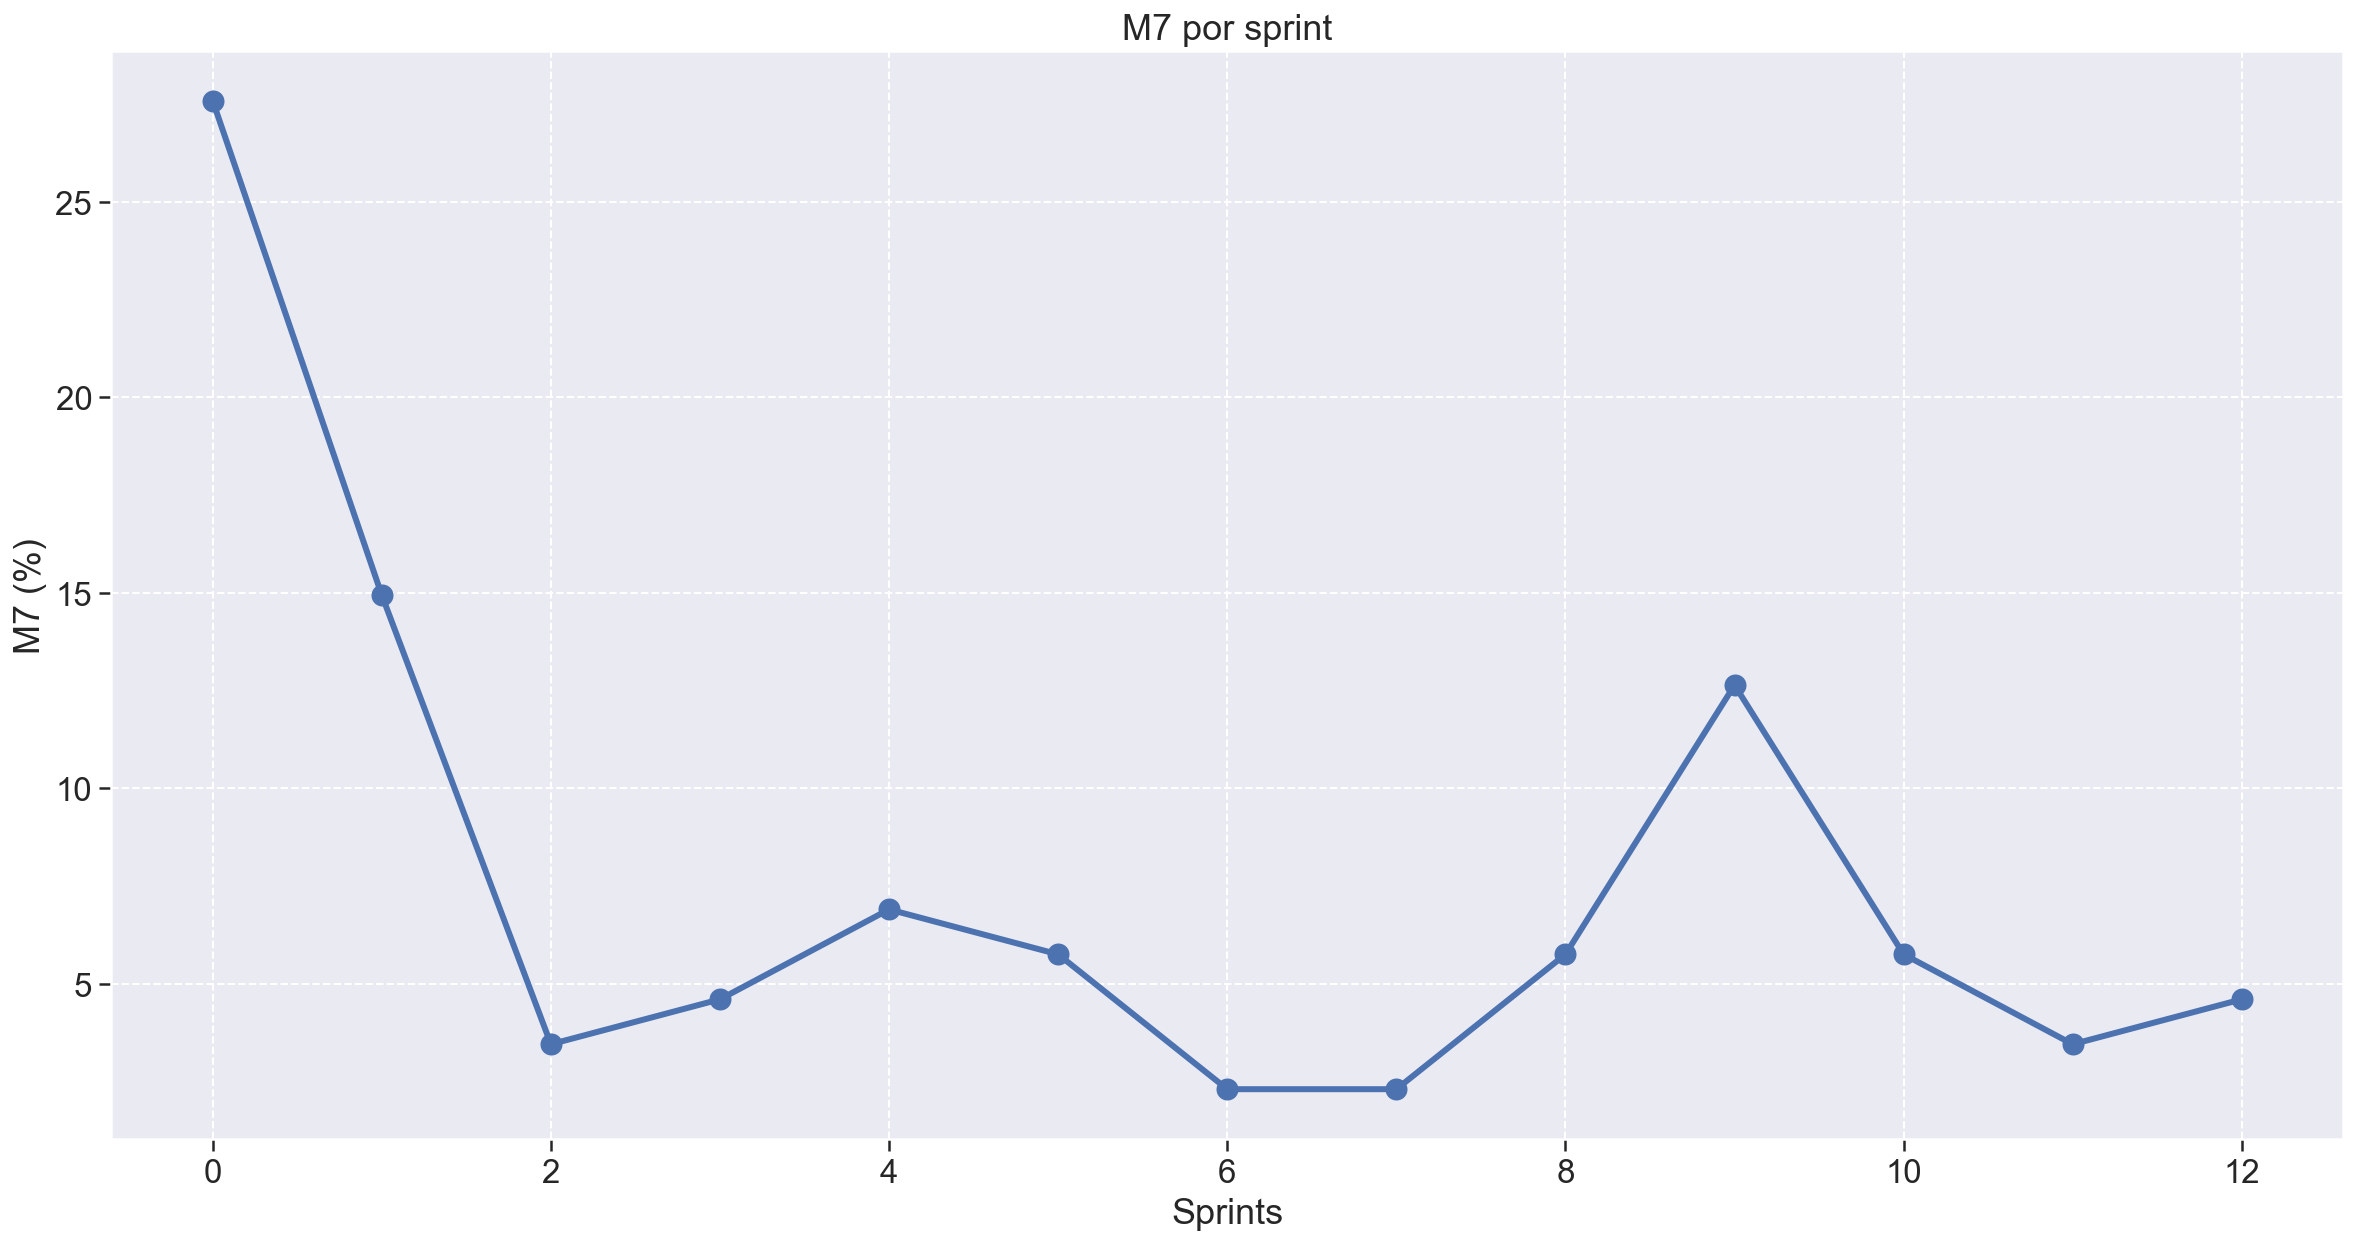

In [42]:
fig = plt.figure(figsize=(20, 10))
plt.title('M7 por sprint')
plt.xlabel('Sprints')
plt.ylabel('M7 (%)')
plt.plot(m7_m9_df['m7'], linewidth=3, marker='o', markersize=10)

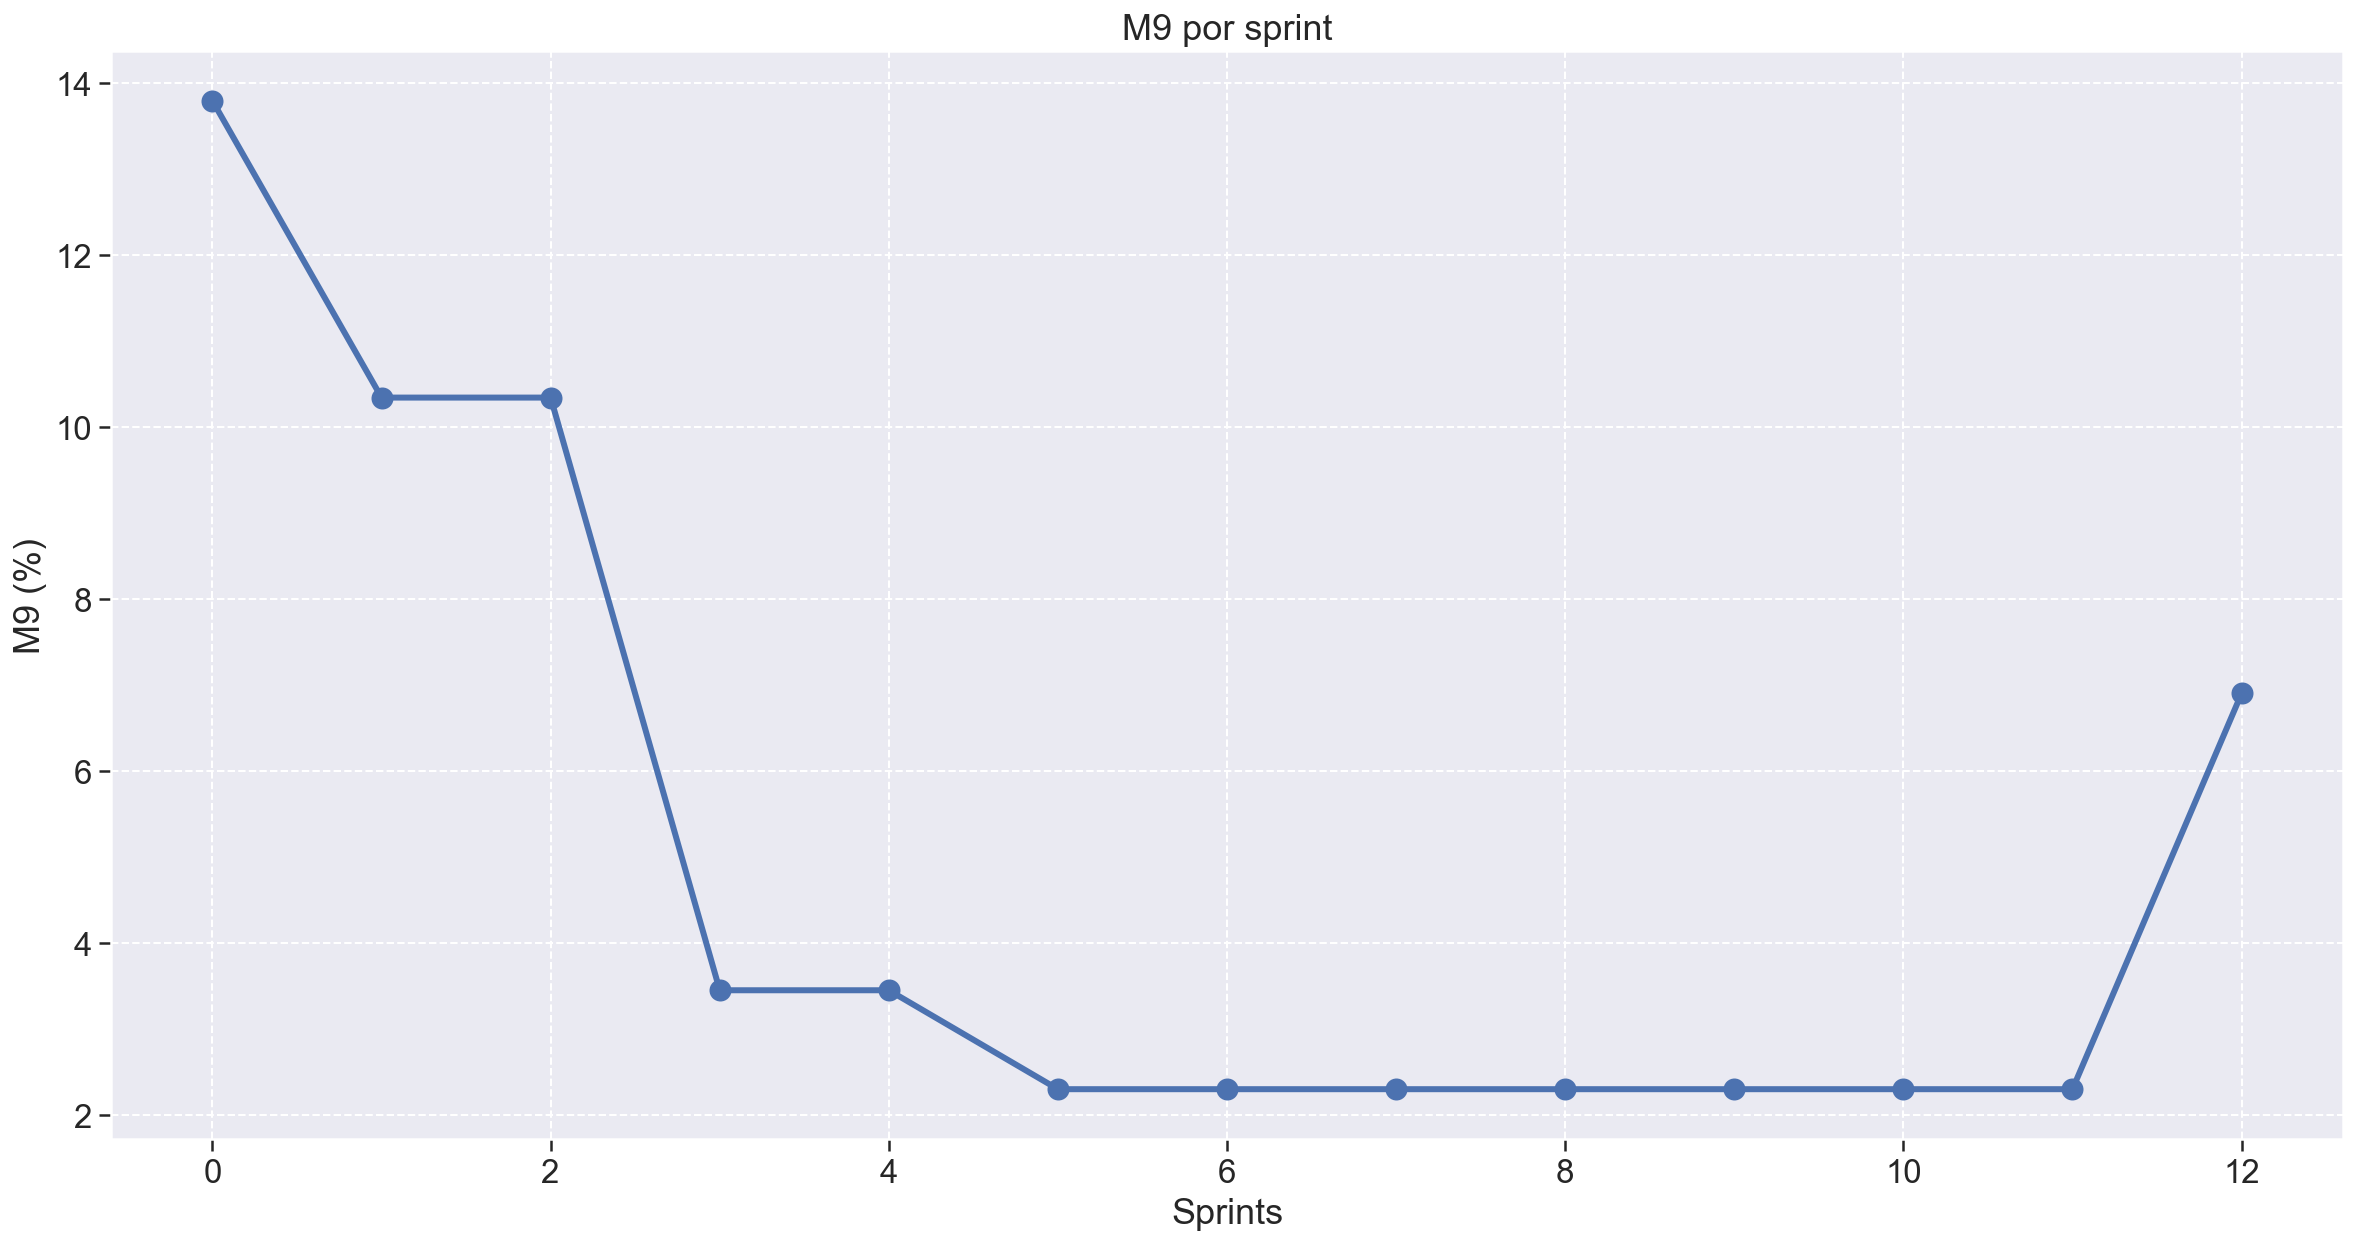

In [43]:
fig = plt.figure(figsize=(20, 10))
plt.title('M9 por sprint')
plt.xlabel('Sprints')
plt.ylabel('M9 (%)')
plt.plot(m7_m9_df['m9'], linewidth=3, marker='o', markersize=10)

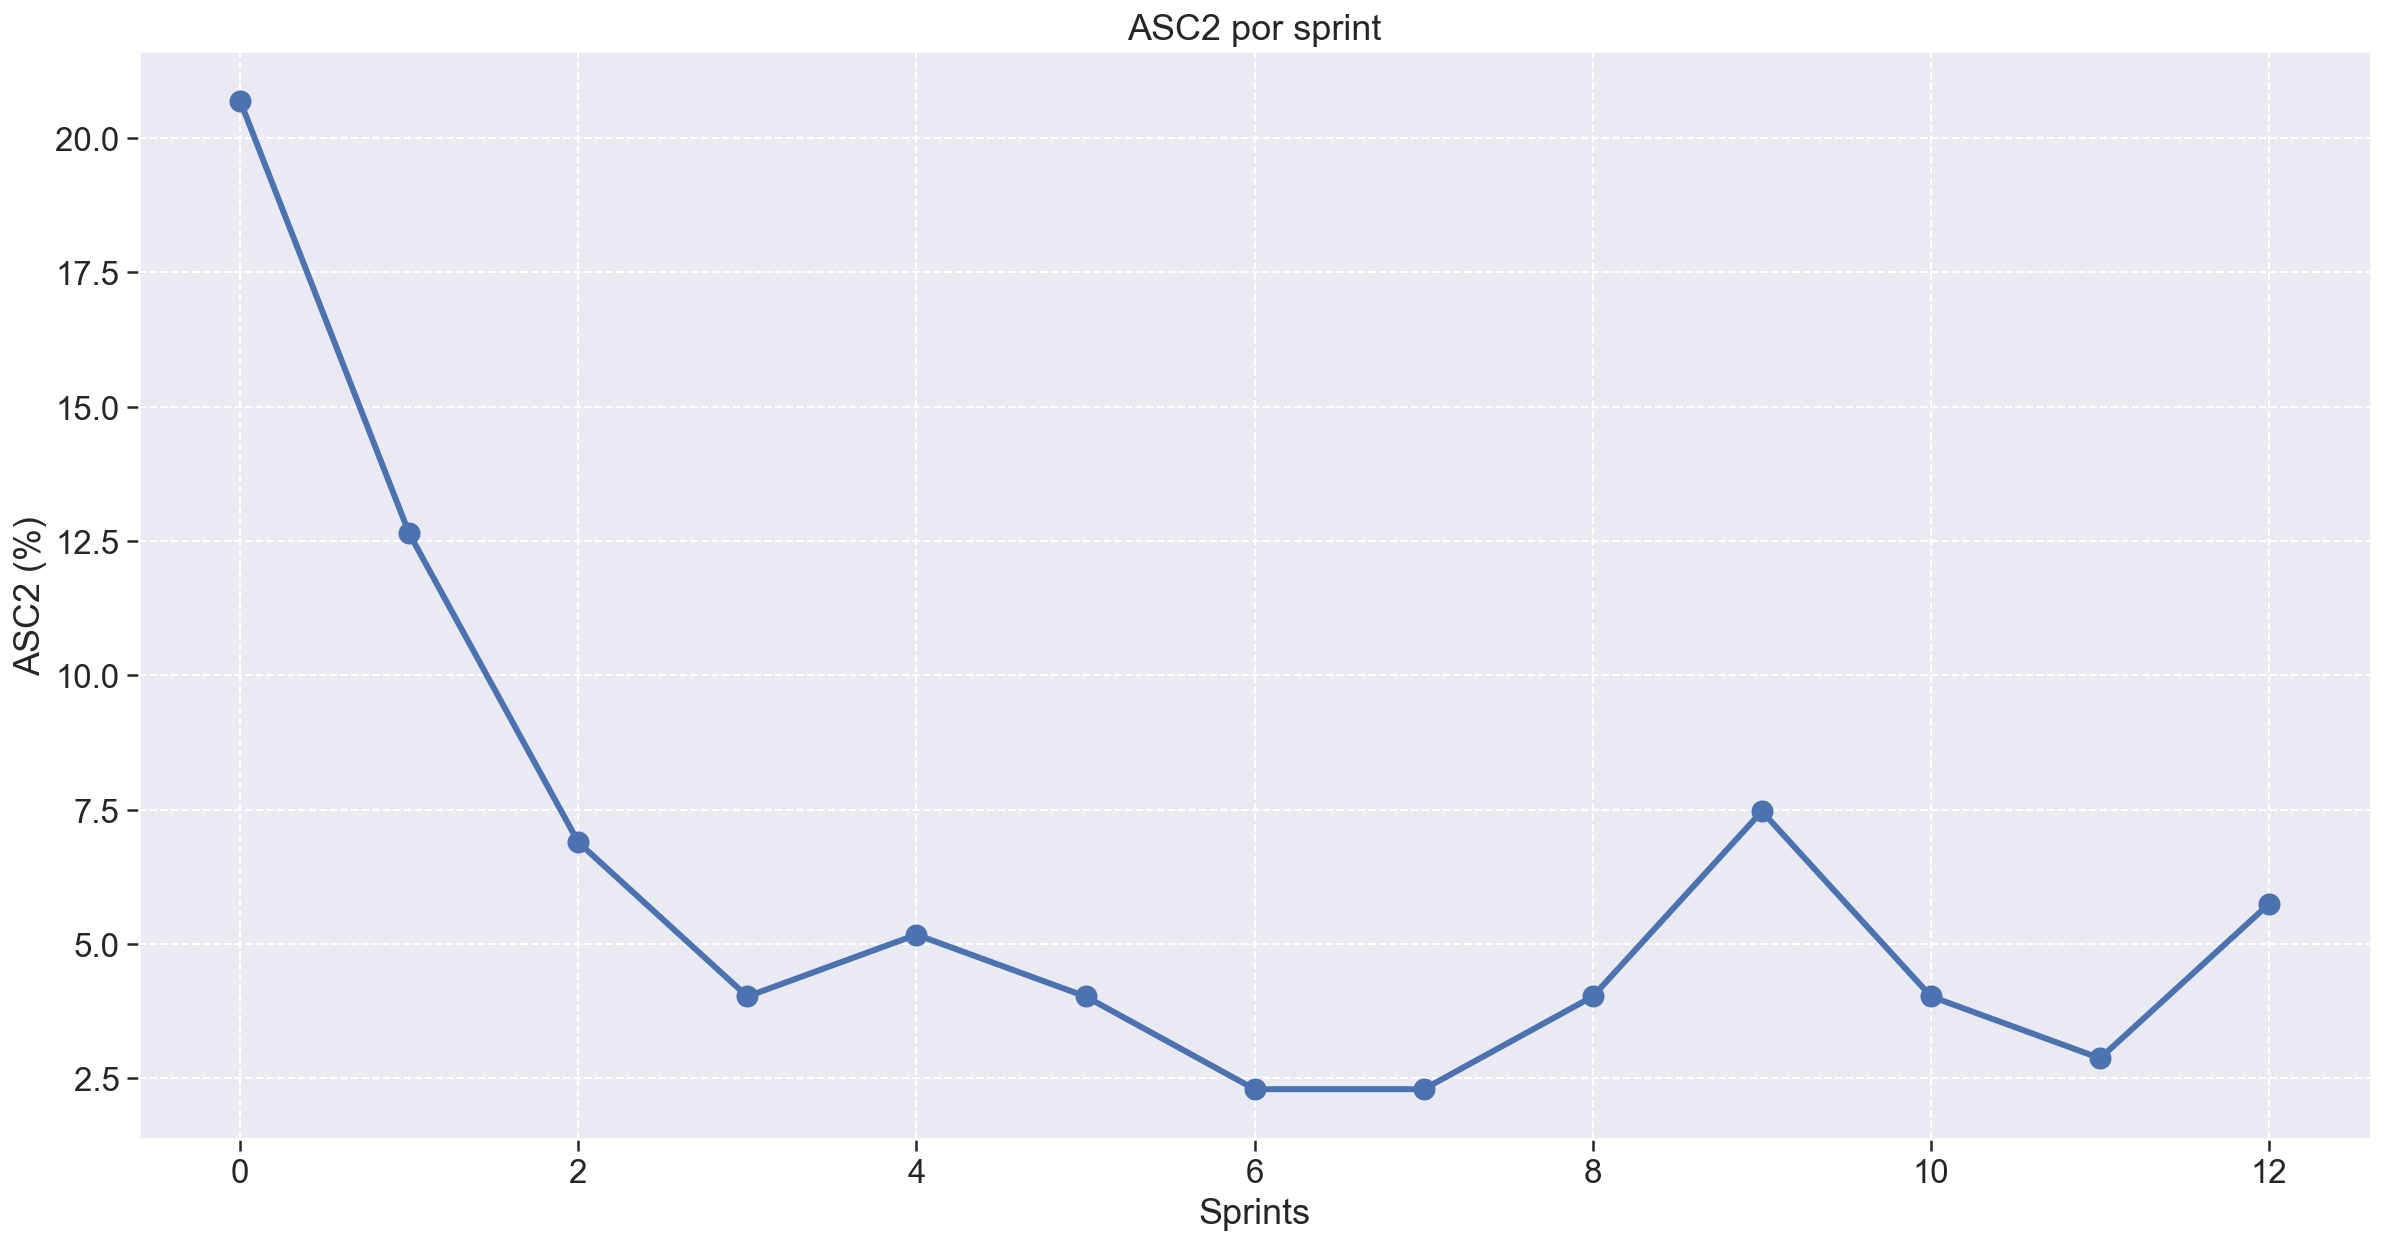

In [44]:
fig = plt.figure(figsize=(20, 10))
plt.title('ASC2 por sprint')
plt.xlabel('Sprints')
plt.ylabel('ASC2 (%)')
plt.plot(m7_m9_df['asc2'], linewidth=3, marker='o', markersize=10)

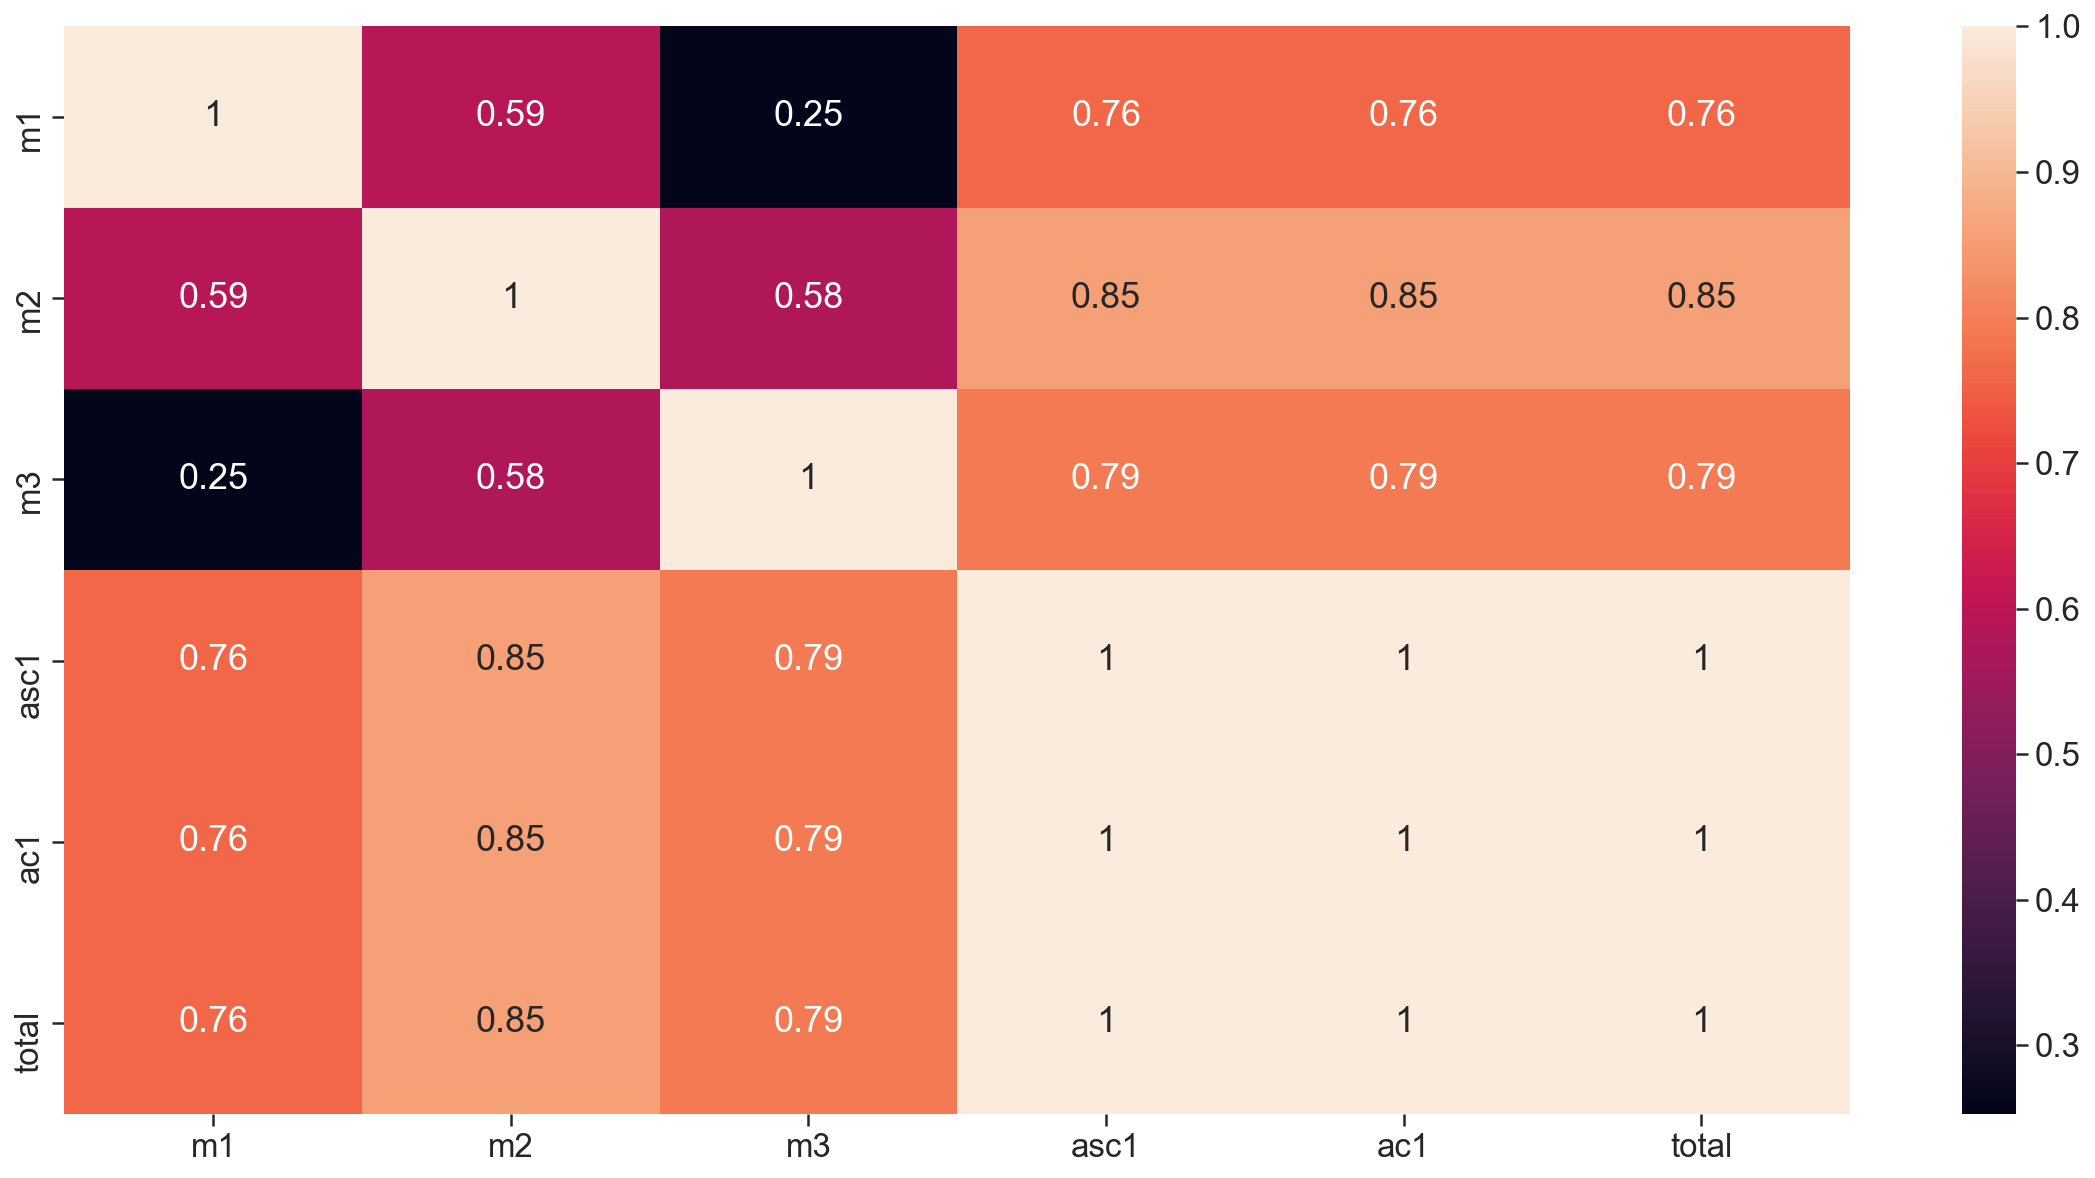

In [45]:
# Matriz de correlação
matriz_corr = metrics_df.corr()

fig = plt.figure(figsize=(20, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

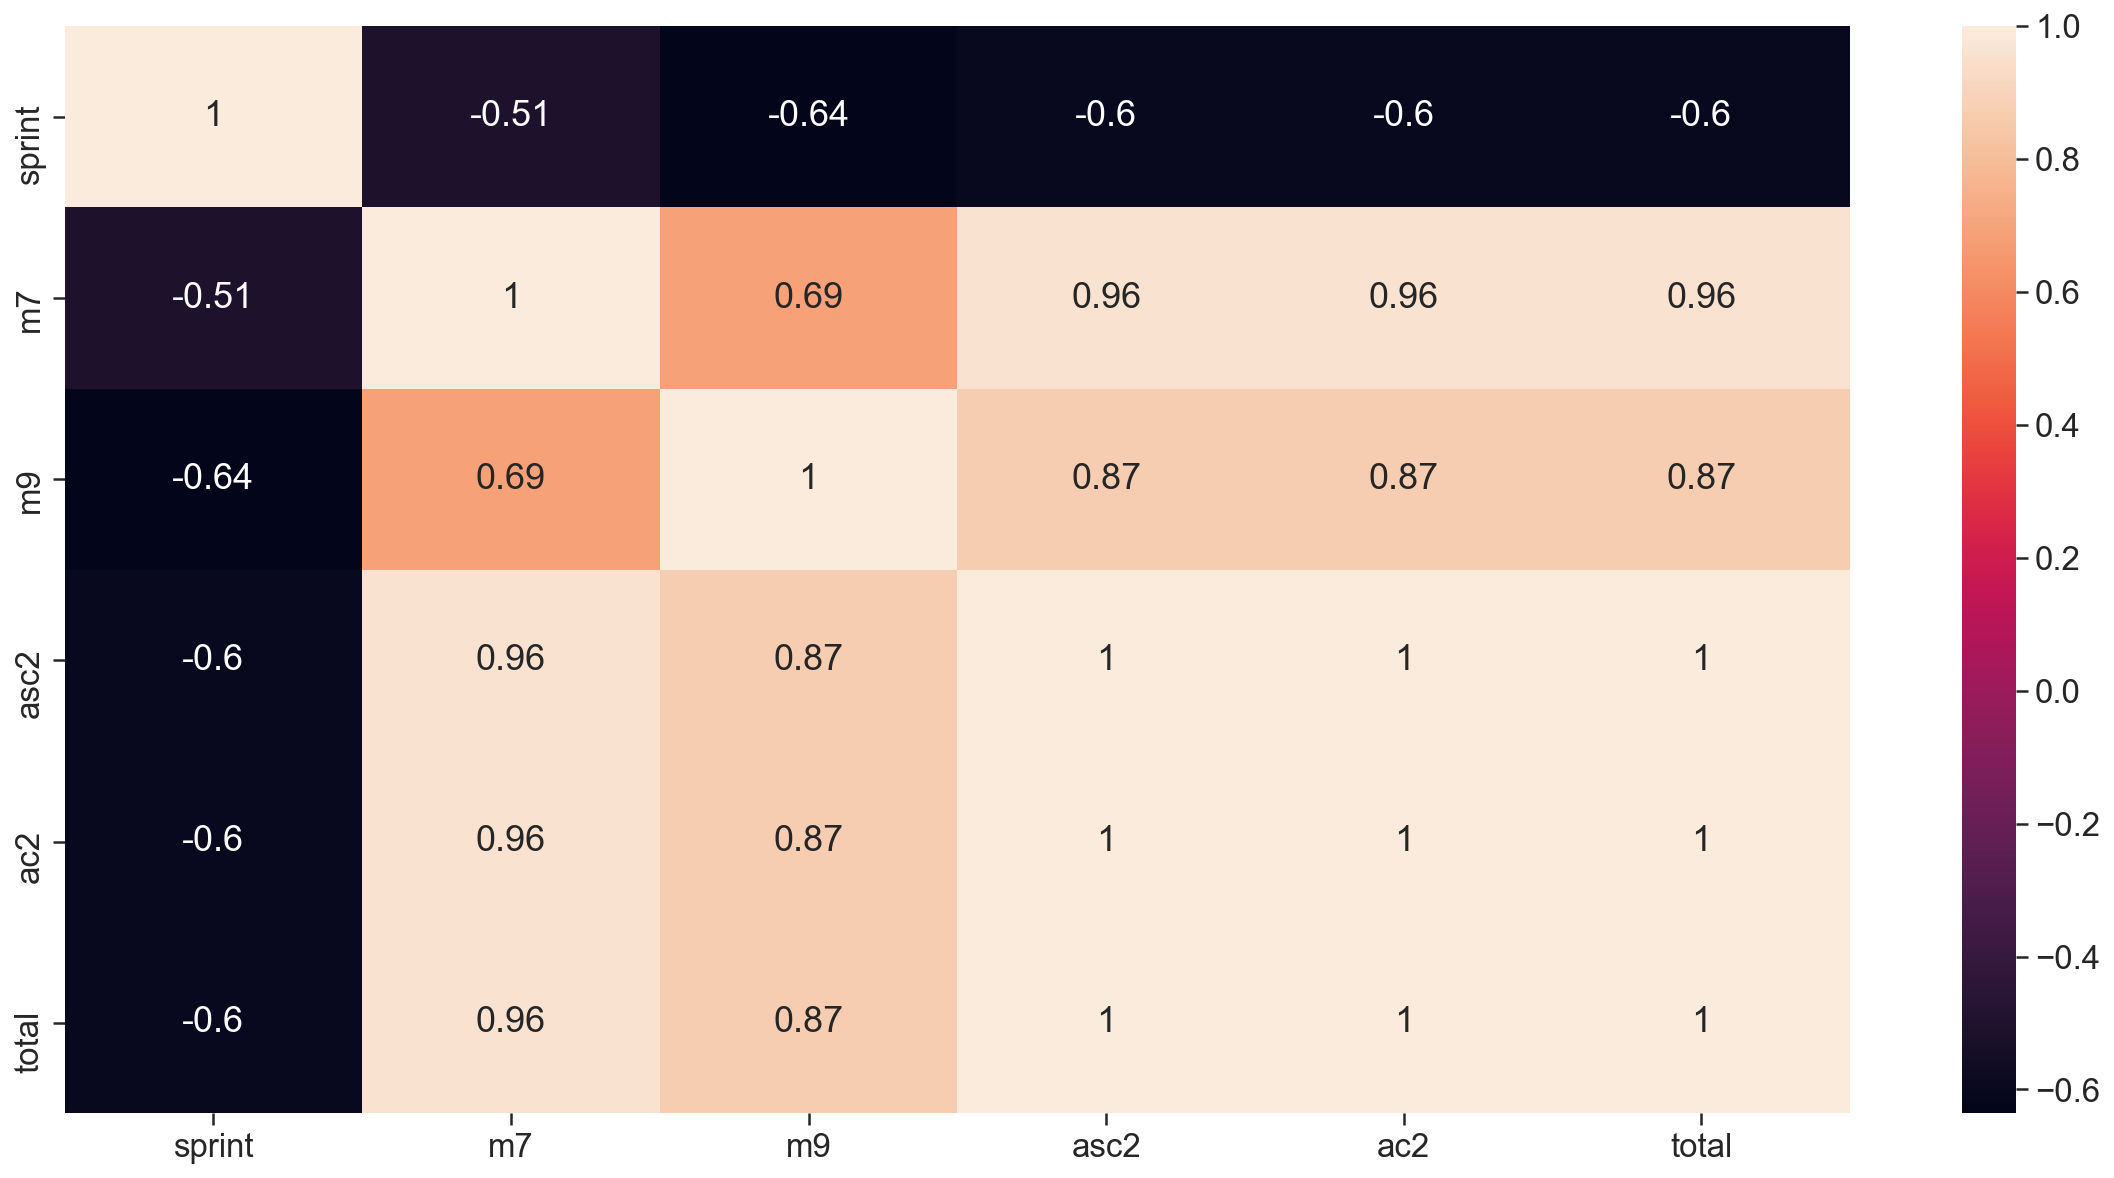

In [46]:
matriz_corr = m7_m9_df.corr()

fig = plt.figure(figsize=(20, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

<AxesSubplot:>

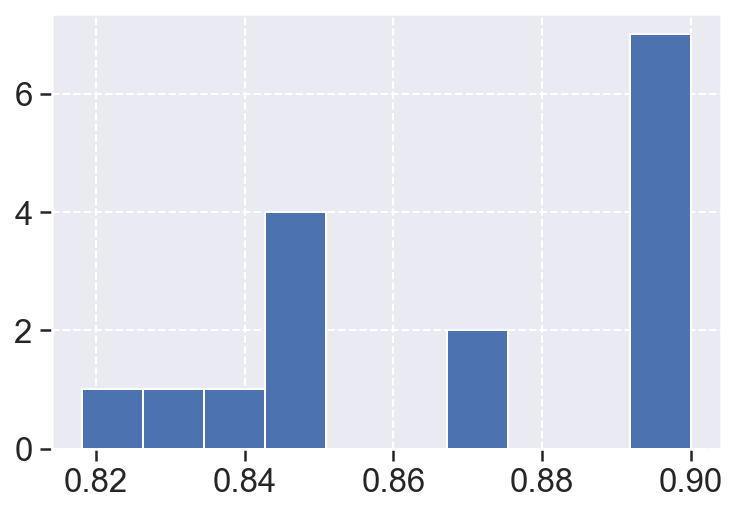

In [47]:
metrics_df['m1'].hist()

<AxesSubplot:>

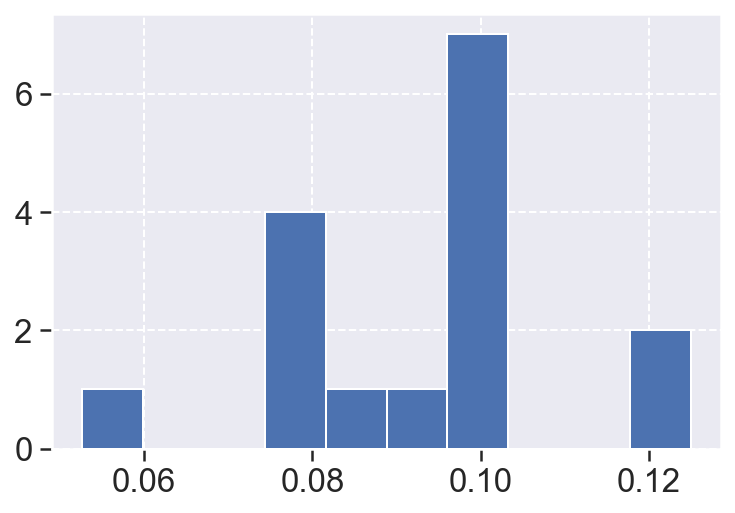

In [48]:
metrics_df['m2'].hist()

<AxesSubplot:>

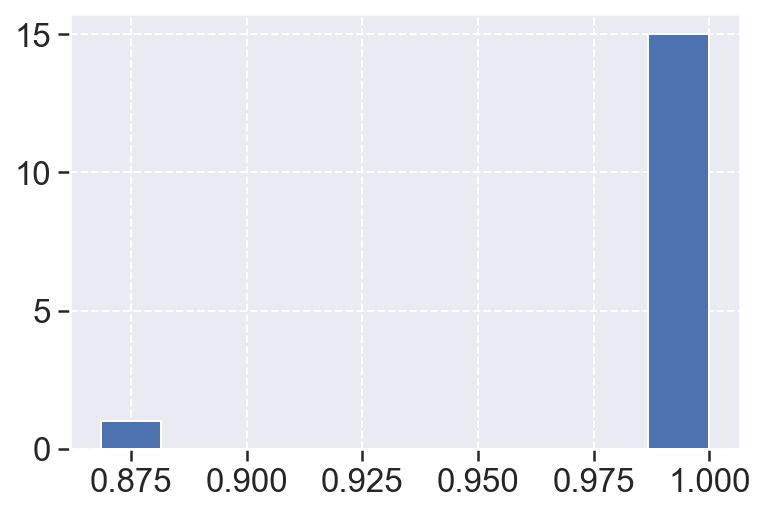

In [49]:
metrics_df['m3'].hist()

<AxesSubplot:>

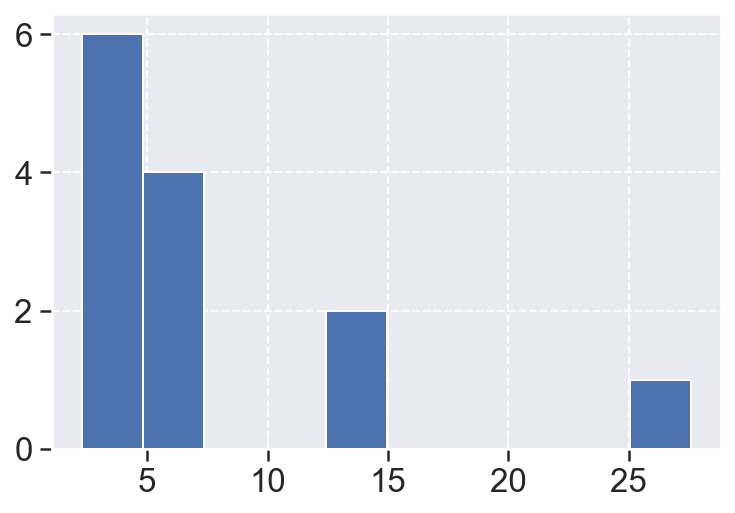

In [50]:
m7_m9_df['m7'].hist()

<AxesSubplot:>

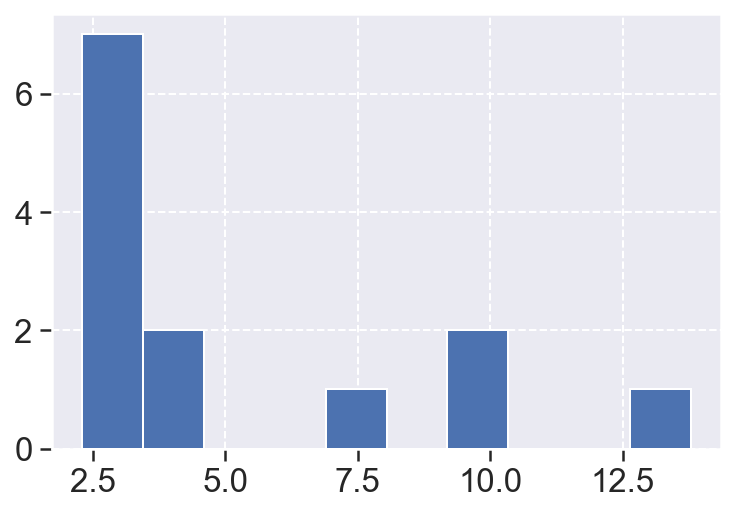

In [51]:
m7_m9_df['m9'].hist()

<AxesSubplot:>

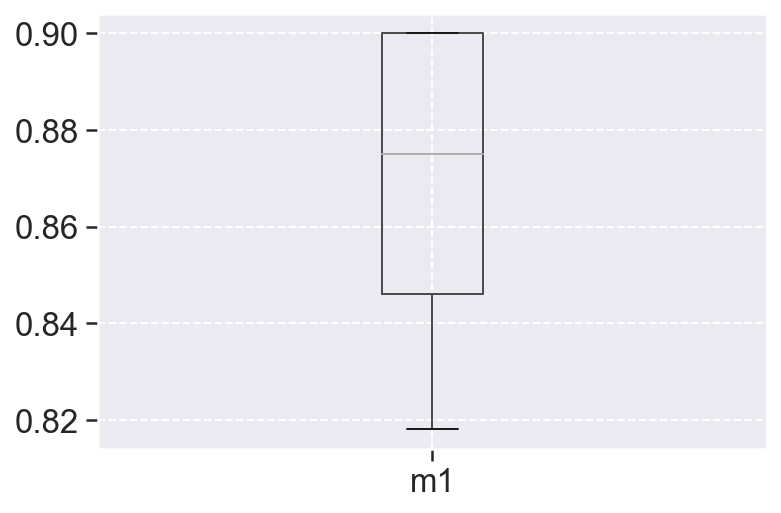

In [52]:
# Boxplots (Fazer também para m7, m8 e m9)
metrics_df[['m1']].boxplot()

<AxesSubplot:>

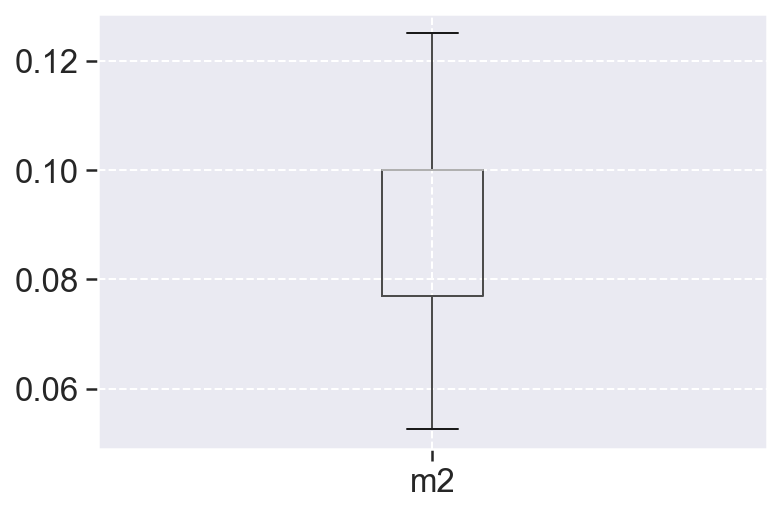

In [53]:
metrics_df[['m2']].boxplot()

<AxesSubplot:>

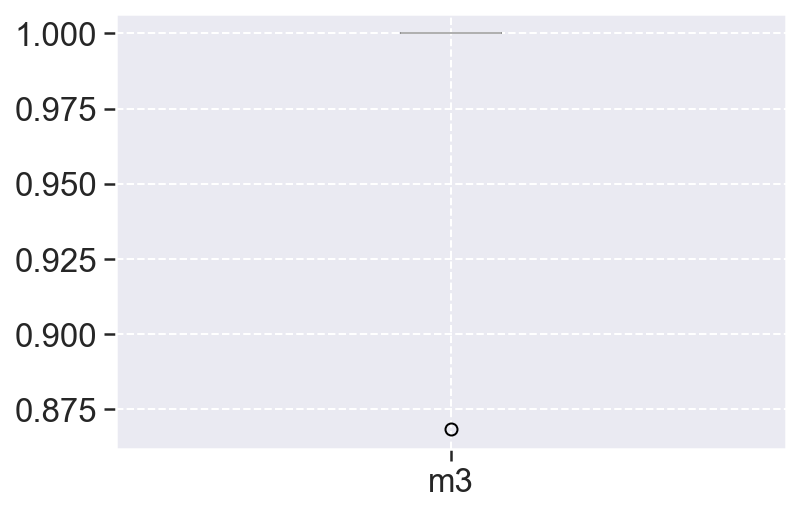

In [54]:
metrics_df[['m3']].boxplot()

<AxesSubplot:>

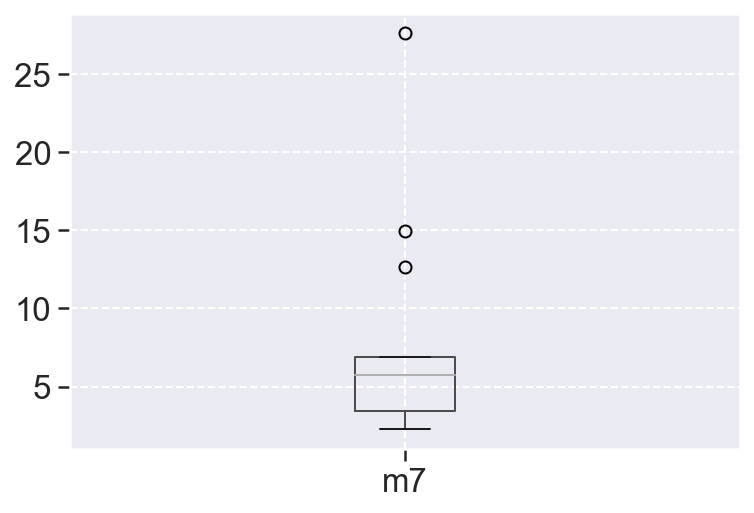

In [55]:
m7_m9_df[['m7']].boxplot()

<AxesSubplot:>

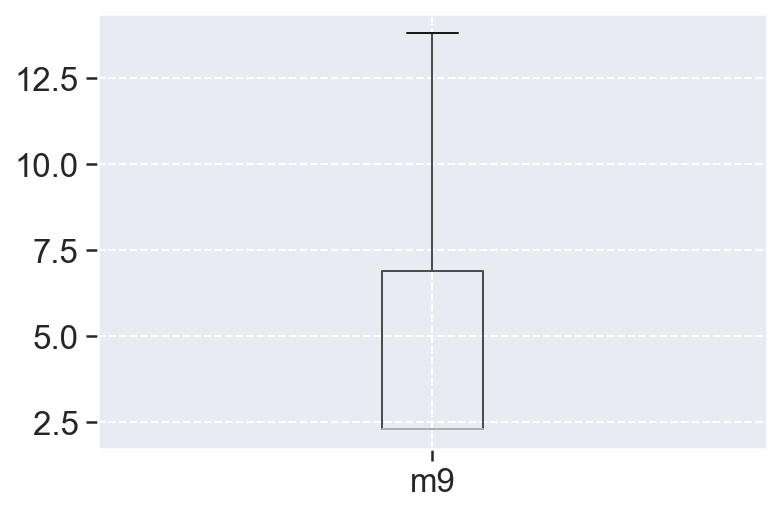

In [56]:
m7_m9_df[['m9']].boxplot()

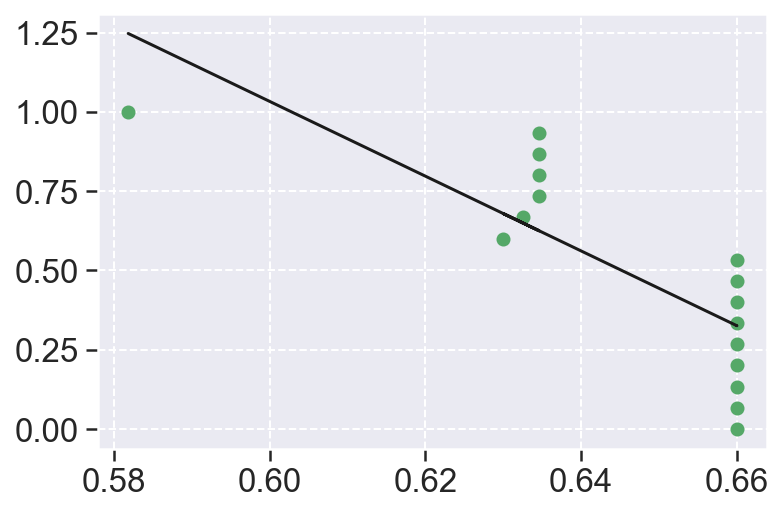

In [57]:
x = metrics_df['ac1'].values[:,np.newaxis]
y = np.linspace(0., 1., 16)
Y = y[:,np.newaxis]

#print('Coefficients: \n', reg.coef_)
reg = LinearRegression().fit(x, y)
plt.scatter(x, y,color='g')
plt.plot(x, reg.predict(x),color='k')


plt.show()